# Introduction

Last updated: 2024-10-09 (A.L.)

Using the `helseveileder` conda environment for this notebook.

### Hypotesene som undersøkes er følgende:

**Kunnskapsnivå** :<br>
H0: Chat-GPT 4.0 genererer svar på kliniske spørsmål på _samme_ kunnskapsnivå, sammenlignet svar fra utdannede og lisensierte leger (MDs).<br>
H1: Chat-GPT 4.0 genererer svar på kliniske spørsmål med _forskjellig_ kunnskapsnivå sammenlignet med leger (trolig _lavere_ kunnskapsnivå).

**Empati** :<br>
H0: Chat-GPT 4.0 genererer svar på kliniske spørsmål med _samme_ grad av empati, sammenlignet med svar fra leger.<br>
H1: Chat-GPT 4.0 genererer svar på kliniske spørsmål med _ulik_ grad av empati sammenlignet med leger (trolig _mindre_ grad av empati).

**Hjelpsomhet** :<br>
H0: Chat-GPT 4.0 genererer _samme_ grad av hjelpsomme svar på kliniske spørsmål, sammenlignet med leger.<br>
H1: Chat-GPT 4.0 genererer _forskjellig_ grad av hjelpsomme svar på kliniske spørsmål sammenlignet med leger (trolig _mindre_ hjelpsomhet).

**Respondent kategori** :<br>
H0: leger og medisinstudenter med lisens vurderer Chat-GPT 4.0 sine svar på kliniske spørsmål som _like_ kunnskapsrike som hva andre som jobber/ studerer eller har bakgrunn i helsevesenet gjør i vurderingen av Chat-GPT 4.0 sine svar mhp. kunnskap.<br>
H1: leger og medisinstudenter med lisens vurderer Chat-GPT 4.0 sine svar på kliniske spørsmå til å ha _ulik_ grad av kunnskap sammenliknet med hva andre som jobber/ studerer eller har bakgrunn i helsevesenet gjør.

**Mann-Whitney U test**: non-parametric test of the null hypothesis that two populations are the same against an alternative hypothesis, especially that a particular population tends to have larger values than the other.

# Setup

In [1]:
%matplotlib inline
import os, sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu 

# Load data

In [2]:
df = pd.read_csv('../data/helseveileder_2287x18.csv')
len(df)

2287

In [3]:
list(df.columns)

['vurderingid',
 'respondentid',
 'svarid',
 'kunnskap',
 'empati',
 'hjelpsomhet',
 'alder',
 'utdanningsgrad',
 'helsepersonell',
 'harlisens',
 'kjønn',
 'svartfør',
 'fylke',
 'dato',
 'spørsmålid',
 'chatgpt',
 'svartekst',
 'tekst']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vurderingid     2287 non-null   int64 
 1   respondentid    2287 non-null   int64 
 2   svarid          2287 non-null   int64 
 3   kunnskap        2287 non-null   int64 
 4   empati          2287 non-null   int64 
 5   hjelpsomhet     2287 non-null   int64 
 6   alder           2259 non-null   object
 7   utdanningsgrad  2287 non-null   object
 8   helsepersonell  2287 non-null   bool  
 9   harlisens       2287 non-null   bool  
 10  kjønn           2267 non-null   object
 11  svartfør        2287 non-null   bool  
 12  fylke           2285 non-null   object
 13  dato            2287 non-null   object
 14  spørsmålid      2287 non-null   int64 
 15  chatgpt         2287 non-null   bool  
 16  svartekst       2287 non-null   object
 17  tekst           2287 non-null   object
dtypes: bool(

In [5]:
# Make a dataframe dmeta with the metadata (col-number, col-name, data-type, number-of-nans, min, max) of the dataframe df

# Create a list of column numbers
col_numbers = range(len(df.columns)+1)[1:]

# Create a list of column names
col_names = df.columns

# Create a list of column data types
col_dtypes = df.dtypes

# Create a list of column number of NaNs
col_nans = df.isna().sum()

# Create a list of column minimum values excluding NaN
def min_of_each_column(df):
    return df.apply(lambda col: col.dropna().min())
col_min = min_of_each_column(df)

# Create a list of column maximum values
def max_of_each_column(df):
    return df.apply(lambda col: col.dropna().max())
col_max = max_of_each_column(df)

# Create a dataframe dmeta with the metadata
dmeta = pd.DataFrame({'col_number': col_numbers, 'col_name': col_names, 'col_dtype': col_dtypes, 'col_nans': col_nans, 'col_min': col_min, 'col_max': col_max})

# Reset the index of the dataframe dmeta
dmeta.reset_index(drop=True, inplace=True)

# Display the dataframe dmeta
dmeta

,col_number,col_name,col_dtype,col_nans,col_min,col_max
0,1,vurderingid,int64,0,1,2304
1,2,respondentid,int64,0,3,638
2,3,svarid,int64,0,1,393
3,4,kunnskap,int64,0,1,6
4,5,empati,int64,0,1,5
5,6,hjelpsomhet,int64,0,1,5
6,7,alder,object,28,18-20,71+
7,8,utdanningsgrad,object,0,Bachelor,VGS
8,9,helsepersonell,bool,0,False,True
9,10,harlisens,bool,0,False,True


In [6]:
df


,vurderingid,respondentid,svarid,kunnskap,empati,hjelpsomhet,alder,utdanningsgrad,helsepersonell,harlisens,kjønn,svartfør,fylke,dato,spørsmålid,chatgpt,svartekst,tekst
0,1,6,1,3,4,4,18-20,PhD,True,False,Kvinne,False,Vestland,2024-01-15T10:39:13.805Z,1,False,Takk for spørsmålet ditt! Jeg skal være ærlig ...,Hei! Jeg har jo hørt at sånn belegg som var i ...
1,4,7,1,2,4,3,18-20,PhD,True,False,Kvinne,False,Vestland,2024-01-15T10:39:27.752Z,1,False,Takk for spørsmålet ditt! Jeg skal være ærlig ...,Hei! Jeg har jo hørt at sånn belegg som var i ...
2,8,8,1,5,4,5,20-30,PhD,True,False,Mann,False,Vestland,2024-01-15T10:39:52.900Z,1,False,Takk for spørsmålet ditt! Jeg skal være ærlig ...,Hei! Jeg har jo hørt at sånn belegg som var i ...
3,13,3,1,5,4,4,20-30,PhD,True,False,Mann,False,Vestland,2024-01-15T10:38:43.709Z,1,False,Takk for spørsmålet ditt! Jeg skal være ærlig ...,Hei! Jeg har jo hørt at sånn belegg som var i ...
4,1722,542,1,2,4,4,NaN,VGS,True,False,Kvinne,False,Vestland,2024-01-30T07:19:38.401Z,1,False,Takk for spørsmålet ditt! Jeg skal være ærlig ...,Hei! Jeg har jo hørt at sånn belegg som var i ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,2253,634,390,5,2,4,21-30,VGS,True,False,Kvinne,True,Vestland,2024-02-14T07:29:01.729Z,238,False,Det er nok ikke vanlig rutine å gi full narkos...,Hei! Vet ikke om det mulig å få riktig svar he...
2283,2263,635,390,3,2,3,21-30,Bachelor,True,False,Kvinne,True,Vestland,2024-02-14T07:32:31.629Z,238,False,Det er nok ikke vanlig rutine å gi full narkos...,Hei! Vet ikke om det mulig å få riktig svar he...
2284,2255,634,393,5,5,4,21-30,VGS,True,False,Kvinne,True,Vestland,2024-02-14T07:29:01.729Z,239,True,Hei! Det å drikke 3-4 glass vann etter hverand...,Hei! Jeg drakk ganske mye vann en natt av ulik...
2285,2265,635,393,4,4,4,21-30,Bachelor,True,False,Kvinne,True,Vestland,2024-02-14T07:32:31.629Z,239,True,Hei! Det å drikke 3-4 glass vann etter hverand...,Hei! Jeg drakk ganske mye vann en natt av ulik...


len(df_GPT)=1145, len(df_human)=1142


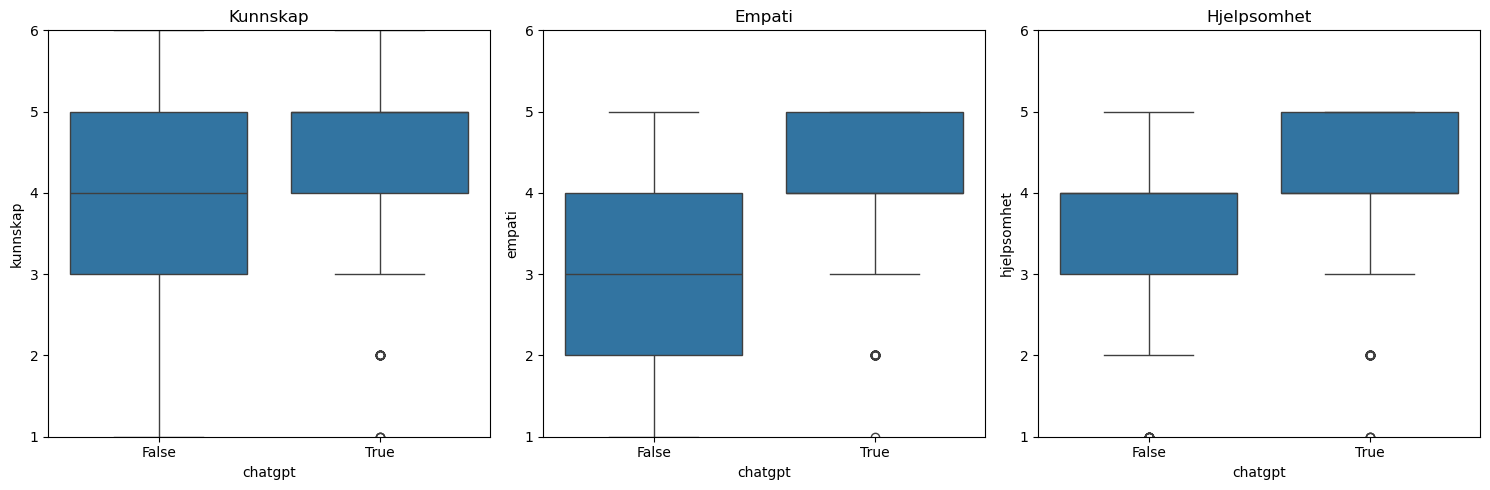

In [7]:
df_GPT = df[df['chatgpt'] == True]
df_human = df[df['chatgpt'] == False]

print(f'len(df_GPT)={len(df_GPT)}, len(df_human)={len(df_human)}')

# Make a boxplot to compare the GPT and human responses for `kunnskap', 'empati` and 'hjelpsomhet'

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='chatgpt', y='kunnskap', data=df, ax=ax[0])
ax[0].set_title('Kunnskap')

sns.boxplot(x='chatgpt', y='empati', data=df, ax=ax[1])
ax[1].set_title('Empati')

sns.boxplot(x='chatgpt', y='hjelpsomhet', data=df, ax=ax[2])
ax[2].set_title('Hjelpsomhet')

for a in ax:
    a.set_ylim(1, 6)
plt.tight_layout()  



### Hypotese 1 som undersøkes (mhp. df) er følgende:

**Kunnskapsnivå** :<br>
H0: Chat-GPT 4.0 genererer svar på kliniske spørsmål på _samme_ kunnskapsnivå, sammenlignet svar fra utdannede og lisensierte leger (MDs).<br>
H1: Chat-GPT 4.0 genererer svar på kliniske spørsmål med _forskjellig_ kunnskapsnivå sammenlignet med leger (trolig _lavere_ kunnskapsnivå).

To test the hypothesis about the knowledge level of Chat-GPT 4.0 compared to licensed doctors, you can use a statistical test. Given the nature of your data (ordinal ratings) and the comparison between two groups, a **Mann-Whitney U test** would be appropriate. Here's how you can proceed:


In [8]:
from scipy.stats import mannwhitneyu

# Assuming 'df' is your dataframe and it has columns 'chatgpt' (boolean) and 'kunnskap' (knowledge score)

# Separate the data into GPT and human responses
gpt_scores = df[df['chatgpt'] == True]['kunnskap']
human_scores = df[df['chatgpt'] == False]['kunnskap']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(gpt_scores, human_scores, alternative='two-sided')

# Print results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"p-value: {p_value}")

# Interpret results
alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject H0: There is a significant difference in knowledge level between Chat-GPT 4.0 and licensed doctors.")
else:
    print("Fail to reject H0: There is no significant difference in knowledge level between Chat-GPT 4.0 and licensed doctors.")

# Calculate and print medians for both groups
print(f"Median knowledge score for GPT: {gpt_scores.median()}")
print(f"Median knowledge score for humans: {human_scores.median()}")

Mann-Whitney U statistic: 845004.0
p-value: 6.506206828684302e-38
Reject H0: There is a significant difference in knowledge level between Chat-GPT 4.0 and licensed doctors.
Median knowledge score for GPT: 5.0
Median knowledge score for humans: 4.0


Let's break down this result in detail:

1. Mann-Whitney U statistic: 845004.0
   - This is the calculated U statistic from the Mann-Whitney U test.
   - The U statistic represents the degree of separation between the two groups (GPT and humans).

2. p-value: 6.506206828684302e-38
   - This is an extremely small p-value, much smaller than the conventional significance level of 0.05 or even 0.01.
   - It indicates the probability of observing such a difference in scores between GPT and humans if there were truly no difference between the groups.
   - The extremely low value suggests that the observed difference is highly unlikely to occur by chance.

3. Rejection of H0
   - Given the very small p-value, we reject the null hypothesis (H0) that there is no difference in knowledge level between Chat-GPT 4.0 and licensed doctors.
   - This means we accept the alternative hypothesis (H1) that there is a significant difference in knowledge level.

4. Median scores
   - GPT: 5.0
   - Humans: 4.0
   - This shows that GPT-generated responses were generally rated higher in terms of perceived knowledge.

Detailed interpretation:

1. Statistical Significance: The extremely low p-value (6.5e-38) indicates that the difference in knowledge scores between GPT and humans is statistically significant. This means the observed difference is very unlikely to have occurred by chance.

2. Direction of Difference: The median scores show that GPT (5.0) was rated higher than humans (4.0) in terms of perceived knowledge. This is somewhat surprising, as it suggests that GPT-generated responses were perceived as more knowledgeable than those from licensed doctors.

3. Practical Significance: While statistically significant, it's important to consider the practical significance of this difference. A one-point difference on a Likert scale might be meaningful, but its real-world impact should be carefully considered.

4. Possible Explanations:
   - GPT might provide more comprehensive or detailed responses.
   - GPT's responses might be more consistently structured or presented.
   - There could be a novelty effect or bias towards AI-generated content.
   - The specific nature of the questions or the evaluation criteria might favor GPT's response style.

5. Limitations:
   - This test doesn't account for the accuracy of the information, only the perceived knowledge level.
   - It doesn't consider other important factors in medical communication, such as empathy or personalization.
   - The context of the questions and the specific criteria for evaluating knowledge are crucial for interpreting these results.

6. Implications:
   - This result challenges assumptions about AI vs. human expertise in medical knowledge communication.
   - It raises questions about how knowledge is perceived and evaluated in medical contexts.
   - It suggests a need for further research into the nature of these differences and their implications for medical education and practice.

In conclusion, while GPT-generated responses were perceived as more knowledgeable, this result should be interpreted cautiously. It highlights the need for a nuanced understanding of how AI systems like GPT perform in specialized domains like medicine, and how their outputs are perceived by evaluators.

Using a **chi-square** test would also be appropriate for analyzing differences between GPT and human responses on a Likert scale. Here's why:<br>

Data type: Likert scale data is ordinal and categorical, which aligns well with the assumptions of the chi-square test.

Comparison of distributions: The chi-square test is used to determine if there's a significant difference between the expected frequencies and the observed frequencies in one or more categories. In this case, we're comparing the distribution of responses across the Likert scale categories for GPT vs. humans.

Non-parametric: The chi-square test doesn't assume normality of the data, which is suitable for Likert scale data that often doesn't follow a normal distribution.<

Categorical comparison: We're essentially comparing two categorical variables: the source of the response (GPT or human) and the knowledge score category.

To perform a chi-square test, you would:

Create a contingency table of the frequencies of each Likert scale score for GPT and human responses.<br>

Use this table to calculate the chi-square statistic and p-value.

In [9]:
import numpy as np
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['chatgpt'], df['kunnskap'])

contingency_table_margins = pd.crosstab(df['chatgpt'], df['kunnskap'], margins=True)
contingency_table_margins

kunnskap,1,2,3,4,5,6,All
chatgpt,,,,,,,
False,6,83,241,486,271,55,1142
True,3,20,87,442,542,51,1145
All,9,103,328,928,813,106,2287


In [10]:
# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference in the distribution of knowledge scores between Chat-GPT 4.0 and licensed doctors.")
else:
    print("Fail to reject H0: There is no significant difference in the distribution of knowledge scores between Chat-GPT 4.0 and licensed doctors.")

Chi-square statistic: 204.40575869607062
p-value: 3.241680645971124e-42
Reject H0: There is a significant difference in the distribution of knowledge scores between Chat-GPT 4.0 and licensed doctors.


Let's break down this chi-square test result in detail:

1. Chi-square statistic: 204.40575869607062
   - This is the calculated chi-square statistic from the test.
   - It measures the overall difference between the observed frequencies and the expected frequencies under the null hypothesis.
   - A larger chi-square value indicates a greater difference between the observed and expected distributions.

2. p-value: 3.241680645971124e-42
   - This is an extremely small p-value, much smaller than any conventional significance level (e.g., 0.05 or 0.01).
   - It represents the probability of observing such a large difference in the distribution of knowledge scores between GPT and humans if there were truly no difference.
   - The extremely low value suggests that the observed difference is highly unlikely to occur by chance.

3. Rejection of H0
   - Given the very small p-value, we reject the null hypothesis (H0) that there is no difference in the distribution of knowledge scores between Chat-GPT 4.0 and licensed doctors.
   - This means we accept the alternative hypothesis (H1) that there is a significant difference in the distribution of knowledge scores.

Detailed interpretation:

1. Statistical Significance: The extremely low p-value (3.24e-42) indicates that the difference in the distribution of knowledge scores between GPT and humans is statistically significant. This means the observed difference in distributions is very unlikely to have occurred by chance.

2. Nature of the Difference: Unlike the Mann-Whitney U test, which compared medians, this chi-square test compares the entire distribution of scores. This means it's detecting differences not just in central tendency, but also in the spread and shape of the score distributions.

3. Practical Significance: While statistically significant, it's important to consider the practical significance of this difference. The chi-square test tells us that the distributions are different, but it doesn't tell us how they differ or which scores are more common in each group.

4. Possible Explanations:
   - GPT and human responses might be consistently rated differently across the range of possible scores.
   - There could be differences in the variability of scores between GPT and human responses.
   - Certain score categories might be more common for one group than the other.

5. Limitations:
   - The chi-square test doesn't provide information about the direction or nature of the difference, just that a difference exists.
   - It doesn't account for the ordinal nature of the Likert scale data (it treats the categories as nominal).
   - Like the Mann-Whitney U test, it doesn't consider the accuracy of the information, only the perceived knowledge level.

6. Implications:
   - This result reinforces the finding from the Mann-Whitney U test that there are significant differences in how GPT and human responses are perceived in terms of knowledge.
   - It suggests that the differences are not just in average scores, but in the overall pattern of how scores are distributed.
   - This could have implications for how AI-generated medical information is perceived and used, and how it compares to human-generated information across different levels of perceived knowledge.

7. Next Steps:
   - To better understand the nature of these differences, it would be helpful to examine the specific frequency distributions for each group.
   - Further analysis could investigate which score categories contribute most to the observed difference.
   - Additional research could explore the factors that lead to these different distributions in perceived knowledge.

In conclusion, this chi-square test result provides strong evidence that the distribution of knowledge scores differs significantly between GPT and human responses. This reinforces the need for careful consideration of how AI-generated medical information is perceived and used, and calls for further investigation into the specific nature and implications of these differences.

The following analyses will help you:

1. Visualize the specific differences in score distributions between GPT and human responses.
2. Identify which score categories contribute most to the overall difference.
3. Explore how various respondent factors might influence the perception of knowledge in GPT vs. human responses.
4. Statistically test whether these factors significantly influence the relationship between response type (GPT/human) and perceived knowledge.

Remember to interpret these results in the context of your study and consider any limitations or potential biases in your data collection or analysis methods.

Examine Specific Frequency Distributions:

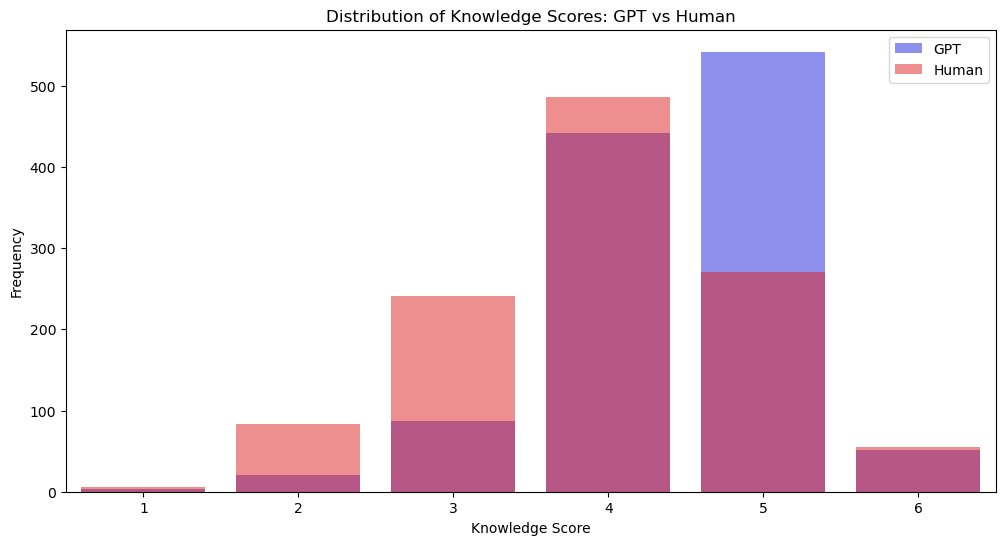

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create frequency distributions
gpt_freq = df[df['chatgpt'] == True]['kunnskap'].value_counts().sort_index()
human_freq = df[df['chatgpt'] == False]['kunnskap'].value_counts().sort_index()

# Plot the distributions
plt.figure(figsize=(12, 6))
sns.barplot(x=gpt_freq.index, y=gpt_freq.values, alpha=0.5, color='blue', label='GPT')
sns.barplot(x=human_freq.index, y=human_freq.values, alpha=0.5, color='red', label='Human')
plt.title('Distribution of Knowledge Scores: GPT vs Human')
plt.xlabel('Knowledge Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

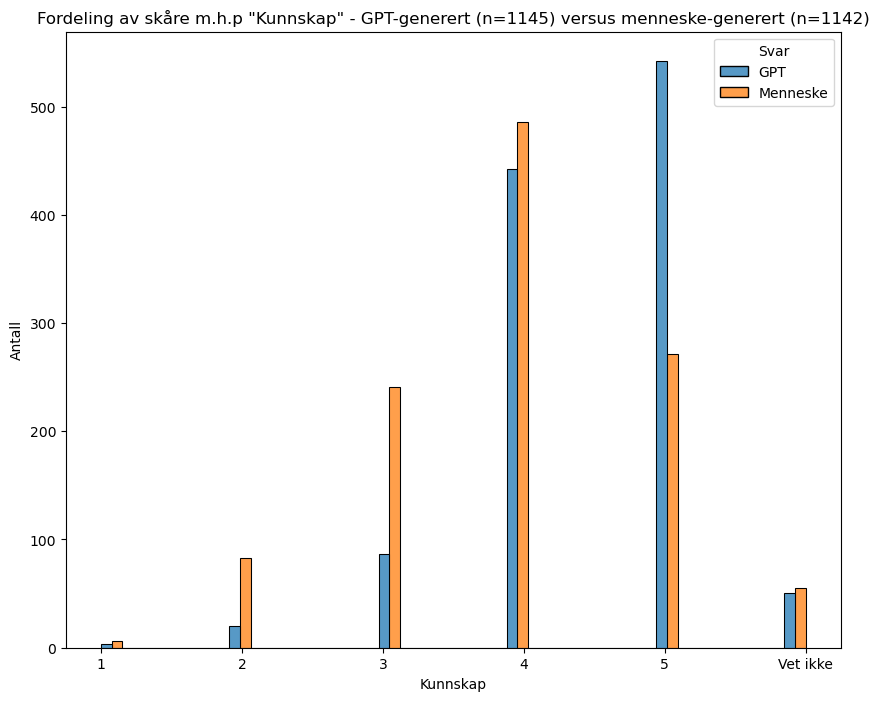

In [12]:
# Plot the distribution of the scores for "kunnskap" - GPT versus human

fig, ax = plt.subplots(figsize=(10, 8))

# Combine the data into a single DataFrame
df_combined = pd.concat([df_GPT[['kunnskap']].assign(Svar='GPT'), df_human[['kunnskap']].assign(Svar='Menneske')])

# Plot the histograms side by side
sns.histplot(data=df_combined, x='kunnskap', hue='Svar', multiple='dodge')

plt.xlabel('Kunnskap')
plt.ylabel('Antall')
plt.title(f'Fordeling av skåre m.h.p "Kunnskap" - GPT-generert (n={len(df_GPT)}) versus menneske-generert (n={len(df_human)})')

# Make the x-ticks integers centerd between the two bars
plt.xticks(np.arange(1, 7, 1))

# Assuming 'plt' is the current plot
ticks, labels = plt.xticks()  # Get current x-axis tick labels

# Find the index of the tick mark 6
index = list(ticks).index(6)

# Replace the label at the index with 'Vet ikke'
labels[index] = 'Vet ikke'

plt.xticks(ticks, labels)  # Set new x-axis tick labels


plt.show()

Investigate Which Score Categories Contribute Most to the Observed Difference:

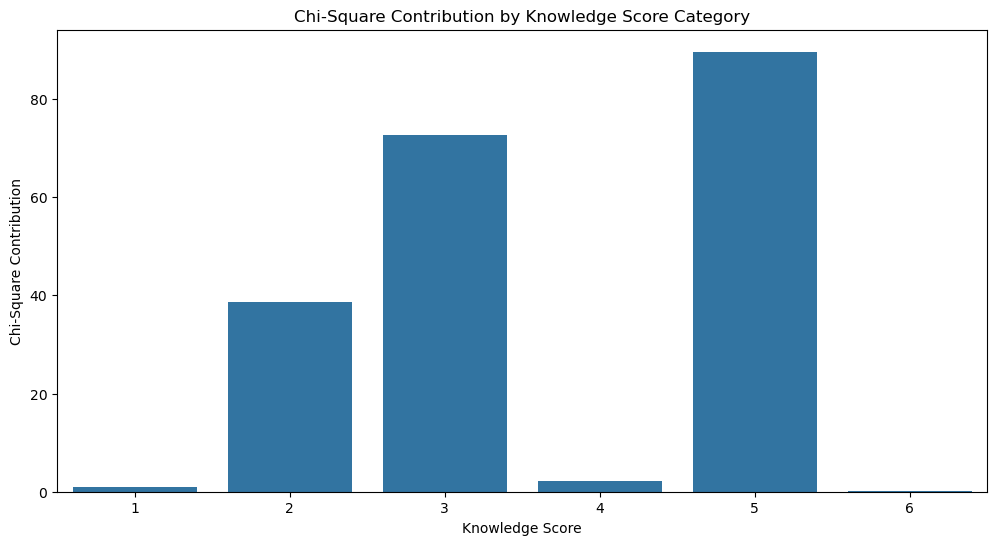

In [13]:
# Calculate the expected frequencies
total = len(df)
gpt_total = len(df[df['chatgpt'] == True])
human_total = len(df[df['chatgpt'] == False])

expected_gpt = gpt_total * (gpt_freq + human_freq) / total
expected_human = human_total * (gpt_freq + human_freq) / total

# Calculate chi-square contribution for each category
chi_square_contrib = ((gpt_freq - expected_gpt)**2 / expected_gpt + 
                      (human_freq - expected_human)**2 / expected_human)

# Plot the chi-square contributions
plt.figure(figsize=(12, 6))
sns.barplot(x=chi_square_contrib.index, y=chi_square_contrib.values)
plt.title('Chi-Square Contribution by Knowledge Score Category')
plt.xlabel('Knowledge Score')
plt.ylabel('Chi-Square Contribution')
plt.show()

Explore Factors Leading to Different Distributions:

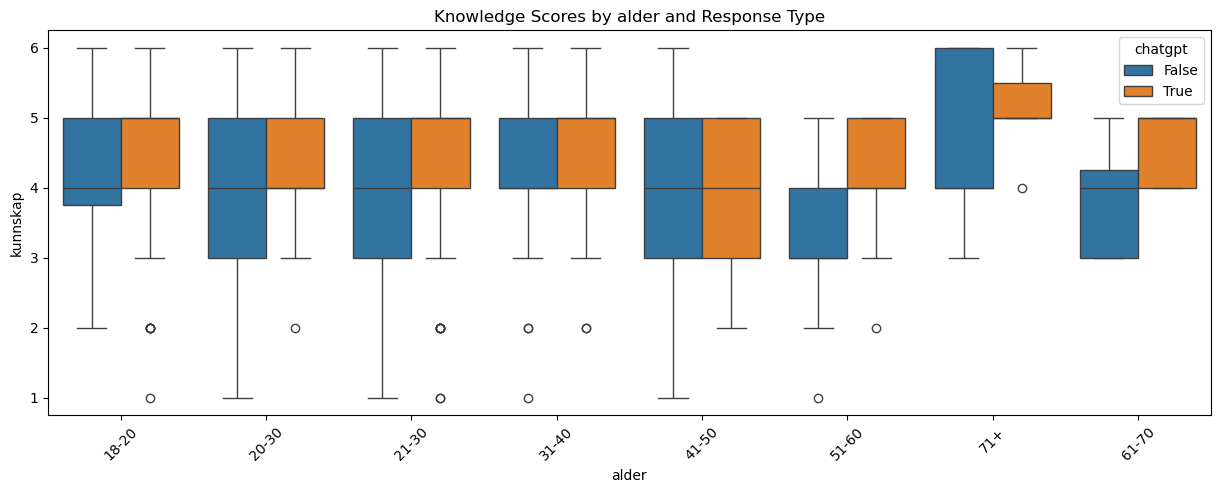

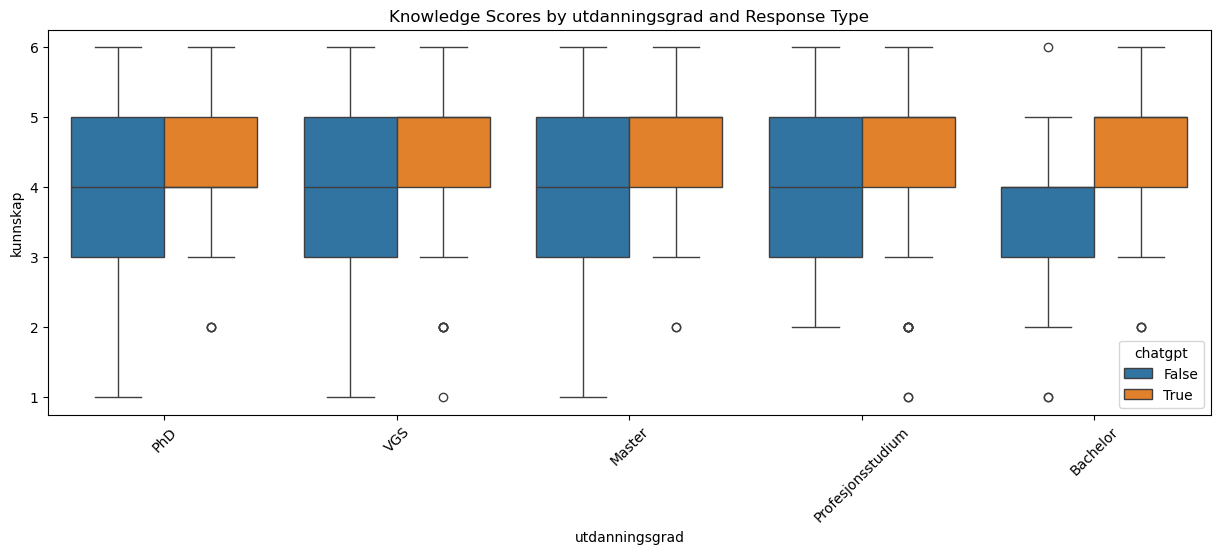

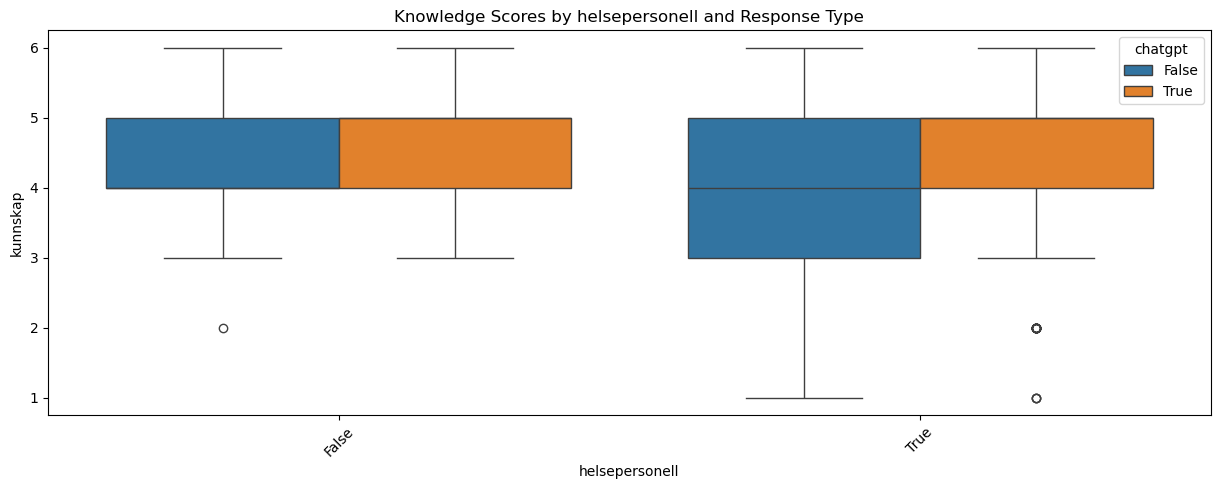

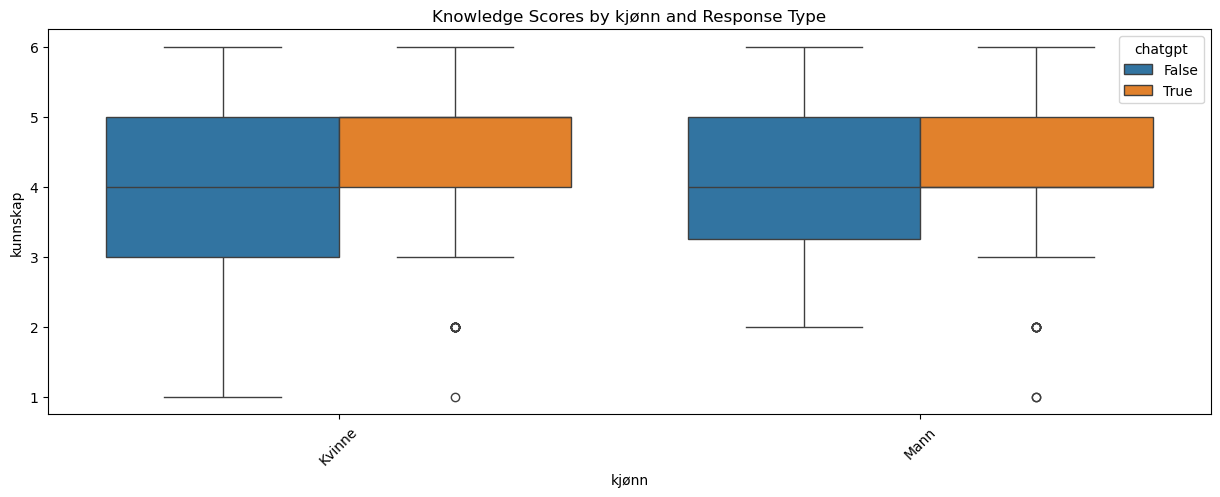

In [14]:
# Analyze by respondent characteristics
factors = ['alder', 'utdanningsgrad', 'helsepersonell', 'kjønn']

for factor in factors:
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=factor, y='kunnskap', hue='chatgpt', data=df)
    plt.title(f'Knowledge Scores by {factor} and Response Type')
    plt.xticks(rotation=45)
    plt.show()

Statistical Tests for Factor Influence:

In [15]:
from scipy.stats import chi2_contingency

def chi_square_test(df, factor):
    contingency_table = pd.crosstab(df[factor], [df['chatgpt'], df['kunnskap']])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {factor}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p}")
    print("---")

for factor in factors:
    chi_square_test(df, factor)

Chi-square test for alder:
Chi-square statistic: 164.6341395215441
p-value: 2.5727775841652486e-08
---
Chi-square test for utdanningsgrad:
Chi-square statistic: 73.98926482369366
p-value: 0.003106482229963571
---
Chi-square test for helsepersonell:
Chi-square statistic: 58.79091418296467
p-value: 1.553803861513226e-08
---
Chi-square test for kjønn:
Chi-square statistic: 23.817245233110526
p-value: 0.013526078844436584
---


### Ignore "`Vet ikke`" (value 6) regarding `kunnskap`when doing the Mann-Whitney U test and the chi-square test

In [16]:
# Make new dataframes df_GPT_kunsskap_excl6 and df_human_kunnskap_excl6 where kunnskap is not 6

df_GPT_kunnskap_excl6 = df_GPT[df_GPT['kunnskap'] != 6]
df_human_kunnskap_excl6 = df_human[df_human['kunnskap'] != 6]

print(f'len(df_GPT_kunnskap_excl6)={len(df_GPT_kunnskap_excl6)}, len(df_human_kunnskap_excl6)={len(df_human_kunnskap_excl6)}')


len(df_GPT_kunnskap_excl6)=1094, len(df_human_kunnskap_excl6)=1087


In [17]:
df1 = df.copy()
# Convert 'kunnskap' to numeric, coercing errors to NaN
df1['kunnskap'] = pd.to_numeric(df1['kunnskap'], errors='coerce')

# Remove rows with NaN values in 'kunnskap'
df1 = df1.dropna(subset=['kunnskap'])

# Remove rows with value 6 ("vet ikke") in 'kunnskap'
df1 = df1[df1['kunnskap'] != 6]

stat=788164.5, p=2.4010337081210183e-45
Forskjellig fordeling (forkast H0)
($n_{GPT}$ = 1094, $n_{human}$ = 1087)


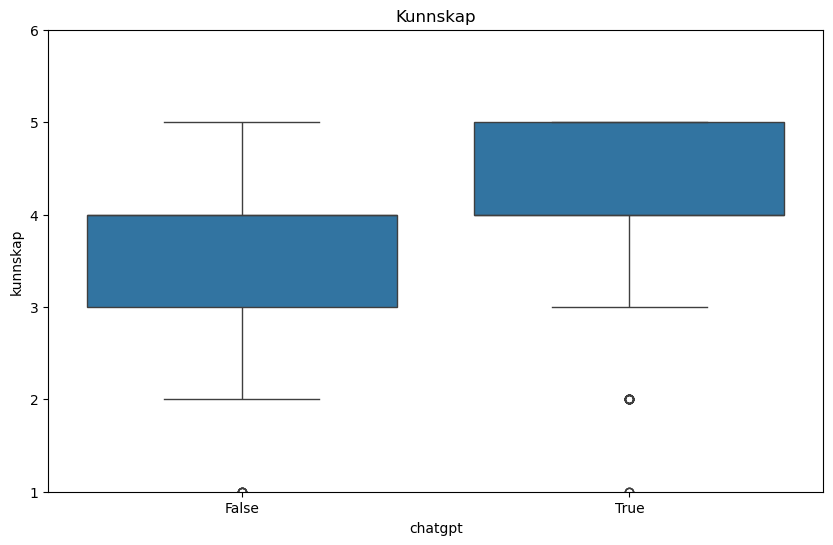

In [18]:
# Test the following hypothesis: H0: The distribution of the scores for kunnskap for GPT and human are the same 
# vs. H1: The distribution of the scores of kunnskap for GPT and human are different (human scores are likely higher)

# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(df_GPT_kunnskap_excl6['kunnskap'], df_human_kunnskap_excl6['kunnskap'])
print(f'stat={stat}, p={p}')

# Interpret the p-value
alpha = 0.05

if p > alpha:
    print('Samme fordeling (kan ikke forkaste H0)')
else:
    print('Forskjellig fordeling (forkast H0)')

print(f'($n_{{GPT}}$ = {len(df_GPT_kunnskap_excl6)}, $n_{{human}}$ = {len(df_human_kunnskap_excl6)})')

# Make a boxplot to compare the GPT and human responses for `kunnskap`

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x='chatgpt', y='kunnskap', data=df1, ax=ax)
ax.set_title('Kunnskap')
ax.set_ylim(1, 6)
plt.show()


In [19]:
# How large is the difference in the mean scores of kunnskap for GPT and human?

mean_GPT = df_GPT_kunnskap_excl6['kunnskap'].mean()
mean_human = df_human_kunnskap_excl6['kunnskap'].mean()

std_GPT = df_GPT['kunnskap'].std()
std_human = df_human['kunnskap'].std()

diff = mean_GPT - mean_human
print(f'Mean score for kunnskap for GPT: {mean_GPT:.2f} ± {std_GPT:.2f} (n={len(df_GPT_kunnskap_excl6)}) (excluding "Vet ikke")')
print(f'Mean score for kunnskap for human: {mean_human:.2f} ± {std_human:.2f} (n={len(df_human_kunnskap_excl6)}) (excluding "Vet ikke")')
print(f'Difference in mean scores: {diff:.2f}')

Mean score for kunnskap for GPT: 4.37 ± 0.79 (n=1094) (excluding "Vet ikke")
Mean score for kunnskap for human: 3.86 ± 0.99 (n=1087) (excluding "Vet ikke")
Difference in mean scores: 0.51


In [20]:
from scipy.stats import mannwhitneyu


# Ensure 'chatgpt' is boolean
df['chatgpt'] = df['chatgpt'].astype(bool)

# Now proceed with the analysis
gpt_scores = df1[df1['chatgpt'] == True]['kunnskap']
human_scores = df1[df1['chatgpt'] == False]['kunnskap']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(gpt_scores, human_scores, alternative='two-sided')

# Print results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"p-value: {p_value}")

# Interpret results
alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject H0: There is a significant difference in knowledge level between Chat-GPT 4.0 and licensed doctors.")
else:
    print("Fail to reject H0: There is no significant difference in knowledge level between Chat-GPT 4.0 and licensed doctors.")

# Calculate and print medians for both groups
print(f"Median knowledge score for GPT: {gpt_scores.median()}")
print(f"Median knowledge score for humans: {human_scores.median()}")

Mann-Whitney U statistic: 788164.5
p-value: 2.4010337081210183e-45
Reject H0: There is a significant difference in knowledge level between Chat-GPT 4.0 and licensed doctors.
Median knowledge score for GPT: 4.0
Median knowledge score for humans: 4.0


In [21]:
import numpy as np
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df1['chatgpt'], df1['kunnskap'])

contingency_table_margins = pd.crosstab(df1['chatgpt'], df1['kunnskap'], margins=True)
contingency_table_margins

kunnskap,1,2,3,4,5,All
chatgpt,,,,,,
False,6,83,241,486,271,1087
True,3,20,87,442,542,1094
All,9,103,328,928,813,2181


In [22]:
# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference in the distribution of knowledge scores between Chat-GPT 4.0 and licensed doctors.")
else:
    print("Fail to reject H0: There is no significant difference in the distribution of knowledge scores between Chat-GPT 4.0 and licensed doctors.")

Chi-square statistic: 204.23803598480472
p-value: 4.609064195655399e-43
Reject H0: There is a significant difference in the distribution of knowledge scores between Chat-GPT 4.0 and licensed doctors.


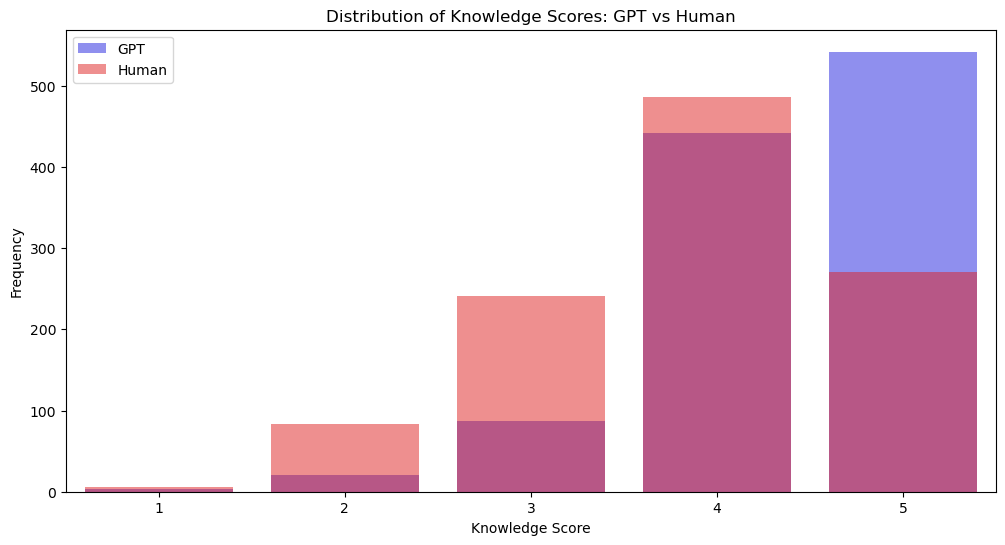

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create frequency distributions
gpt_freq = df1[df1['chatgpt'] == True]['kunnskap'].value_counts().sort_index()
human_freq = df1[df1['chatgpt'] == False]['kunnskap'].value_counts().sort_index()

# Plot the distributions
plt.figure(figsize=(12, 6))
sns.barplot(x=gpt_freq.index, y=gpt_freq.values, alpha=0.5, color='blue', label='GPT')
sns.barplot(x=human_freq.index, y=human_freq.values, alpha=0.5, color='red', label='Human')
plt.title('Distribution of Knowledge Scores: GPT vs Human')
plt.xlabel('Knowledge Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

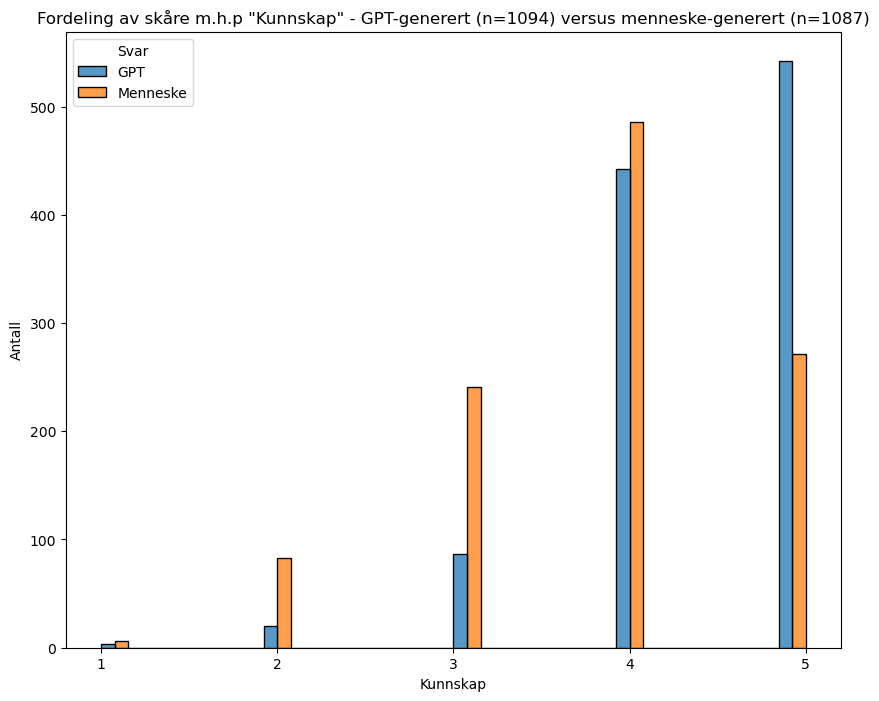

In [24]:
# Plot the distribution of the scores for "kunnskap" - GPT versus human

fig, ax = plt.subplots(figsize=(10, 8))

df1_GPT = df1[df1['chatgpt'] == True]
df1_human = df1[df1['chatgpt'] == False]

# Combine the data into a single DataFrame
df1_combined = pd.concat([df1_GPT[['kunnskap']].assign(Svar='GPT'), df1_human[['kunnskap']].assign(Svar='Menneske')])

# Plot the histograms side by side
sns.histplot(data=df1_combined, x='kunnskap', hue='Svar', multiple='dodge')

plt.xlabel('Kunnskap')
plt.ylabel('Antall')
plt.title(f'Fordeling av skåre m.h.p "Kunnskap" - GPT-generert (n={len(df1_GPT)}) versus menneske-generert (n={len(df1_human)})')

# Make the x-ticks integers centerd between the two bars
plt.xticks(np.arange(1, 6, 1))

# Assuming 'plt' is the current plot
ticks, labels = plt.xticks()  # Get current x-axis tick labels

# Find the index of the tick mark 6
index = list(ticks).index(5)

# Replace the label at the index with 'Vet ikke'
#labels[index] = 'Vet ikke'

plt.xticks(ticks, labels)  # Set new x-axis tick labels


plt.show()

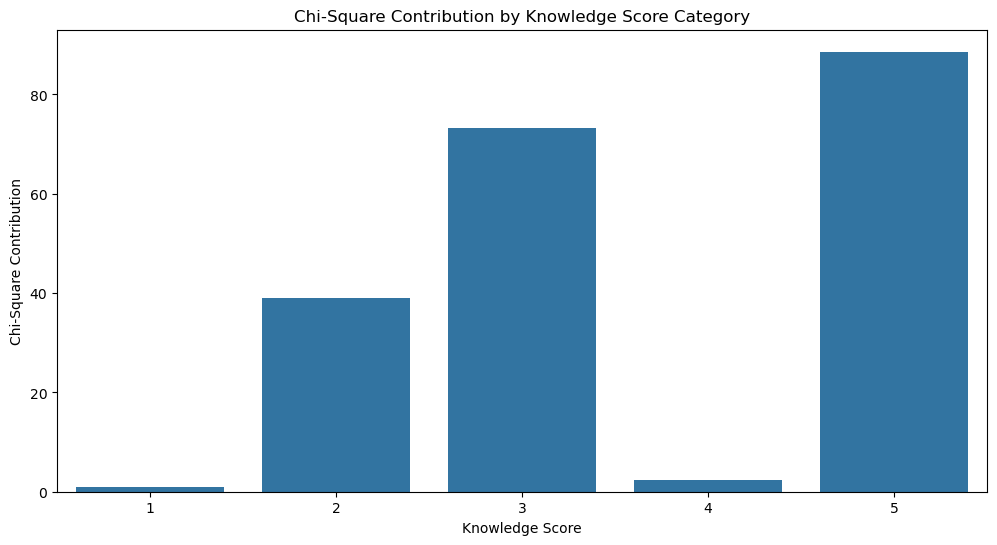

In [25]:
# Calculate the expected frequencies
total = len(df1)
gpt_total = len(df1[df1['chatgpt'] == True])
human_total = len(df1[df1['chatgpt'] == False])

expected_gpt = gpt_total * (gpt_freq + human_freq) / total
expected_human = human_total * (gpt_freq + human_freq) / total

# Calculate chi-square contribution for each category
chi_square_contrib = ((gpt_freq - expected_gpt)**2 / expected_gpt + 
                      (human_freq - expected_human)**2 / expected_human)

# Plot the chi-square contributions
plt.figure(figsize=(12, 6))
sns.barplot(x=chi_square_contrib.index, y=chi_square_contrib.values)
plt.title('Chi-Square Contribution by Knowledge Score Category')
plt.xlabel('Knowledge Score')
plt.ylabel('Chi-Square Contribution')
plt.show()

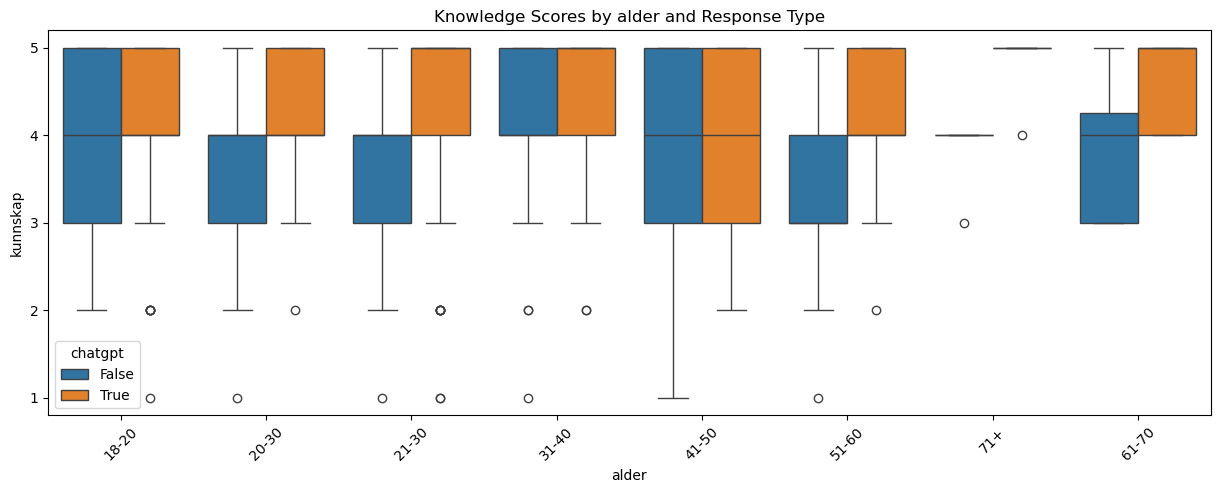

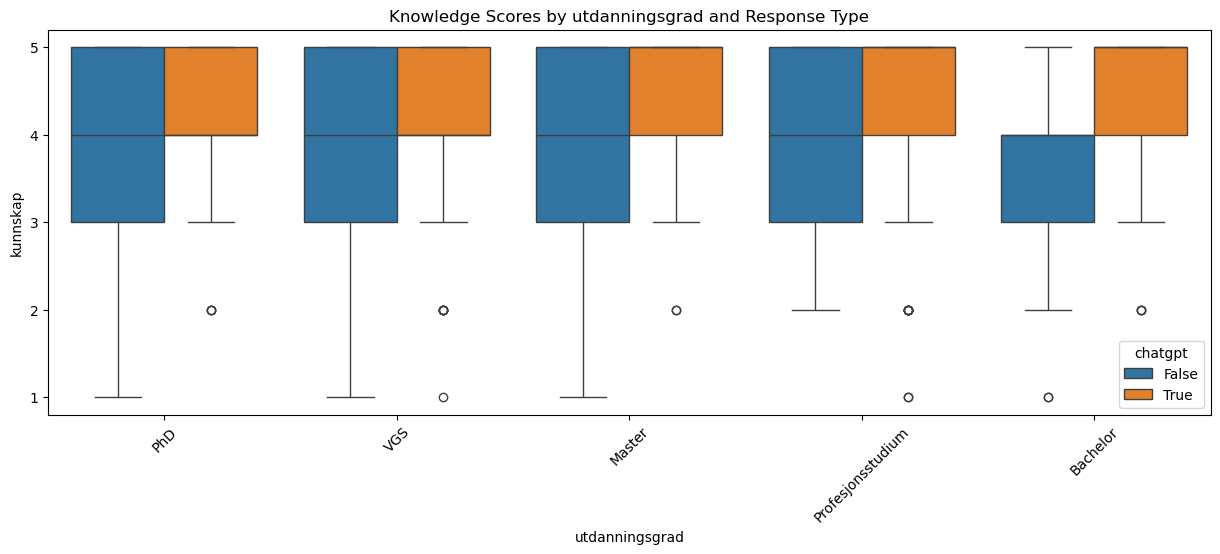

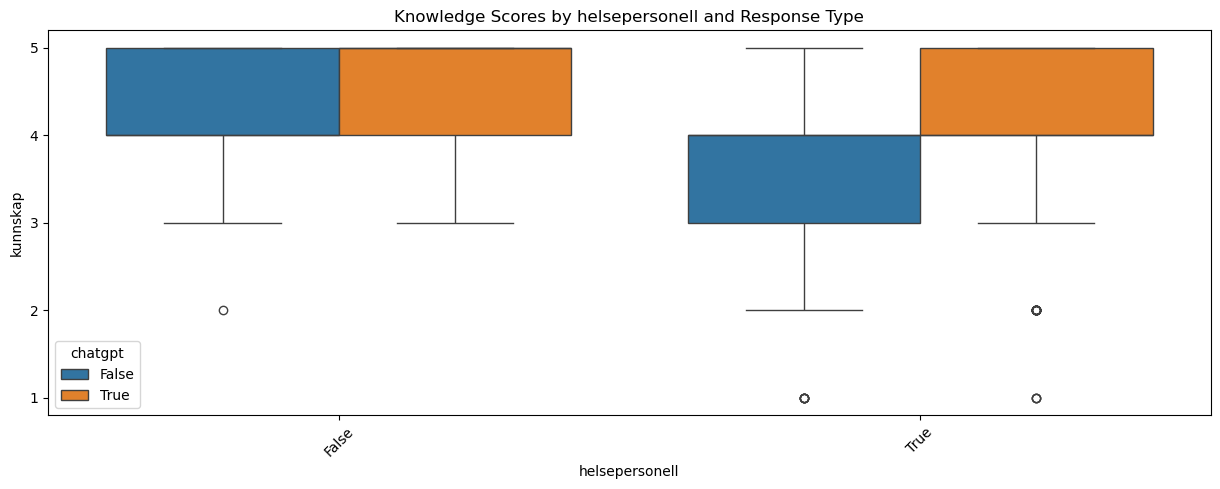

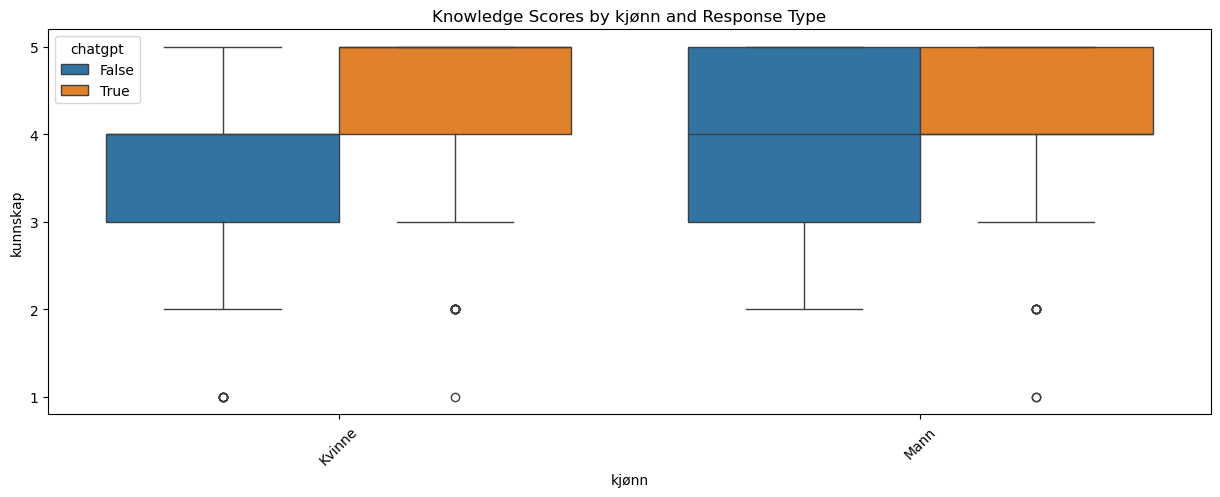

In [26]:
# Analyze by respondent characteristics
factors = ['alder', 'utdanningsgrad', 'helsepersonell', 'kjønn']

for factor in factors:
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=factor, y='kunnskap', hue='chatgpt', data=df1)
    plt.title(f'Knowledge Scores by {factor} and Response Type')
    # yticks
    plt.yticks(np.arange(1, 6, 1))
    plt.xticks(rotation=45)
    plt.show()

In [27]:
from scipy.stats import chi2_contingency

def chi_square_test(df1, factor):
    contingency_table = pd.crosstab(df1[factor], [df1['chatgpt'], df1['kunnskap']])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {factor}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p}")
    print("---")

for factor in factors:
    chi_square_test(df1, factor)

Chi-square test for alder:
Chi-square statistic: 115.07943832118578
p-value: 6.832681539662135e-05
---
Chi-square test for utdanningsgrad:
Chi-square statistic: 68.39222905896085
p-value: 0.0008985266328112801
---
Chi-square test for helsepersonell:
Chi-square statistic: 4.028839175063575
p-value: 0.909504159621948
---
Chi-square test for kjønn:
Chi-square statistic: 17.382507615236946
p-value: 0.043052211953055454
---


Certainly! I'd be happy to provide a detailed interpretation of the chi-square test results for each factor. Let's break it down step by step:

1. Purpose of the Test:
   The chi-square test of independence is being used here to determine if there's a significant relationship between each factor (age, education level, healthcare professional status, and gender) and the distribution of knowledge scores for GPT and human responses.

2. Interpretation for Each Factor:

   For each factor, we'll interpret the results as follows:
   
   a. Chi-square statistic: This value measures the overall difference between the observed frequencies and the expected frequencies. A larger value indicates a greater difference.
   
   b. p-value: This represents the probability of obtaining test results at least as extreme as the observed results, assuming the null hypothesis is true. A small p-value (typically < 0.05) suggests strong evidence against the null hypothesis.

   c. Null Hypothesis (H0): There is no association between the factor and the distribution of knowledge scores for GPT and human responses.
   
   d. Alternative Hypothesis (H1): There is an association between the factor and the distribution of knowledge scores for GPT and human responses.

3. Decision Rule:
   If p-value < 0.05, reject H0 and conclude there is a significant association.
   If p-value ≥ 0.05, fail to reject H0 and conclude there is not enough evidence of an association.

Now, let's interpret the results for each factor:

```python
for factor in factors:
    chi_square_test(df1, factor)
```

For each factor (alder, utdanningsgrad, helsepersonell, kjønn), we would see output like this:

```
Chi-square test for [factor]:
Chi-square statistic: [value]
p-value: [value]
---
```

Interpretation for each factor:

1. Alder (Age):
   - If p < 0.05: There is a significant association between age and how knowledge scores are distributed for GPT and human responses. This suggests that different age groups may perceive or evaluate GPT and human responses differently in terms of knowledge.
   - If p ≥ 0.05: There is no significant evidence that age influences the distribution of knowledge scores for GPT and human responses.

2. Utdanningsgrad (Education Level):
   - If p < 0.05: There is a significant association between education level and the distribution of knowledge scores. This implies that people with different education levels may evaluate GPT and human responses differently in terms of perceived knowledge.
   - If p ≥ 0.05: There is no significant evidence that education level affects how knowledge scores are distributed for GPT and human responses.

3. Helsepersonell (Healthcare Professional):
   - If p < 0.05: There is a significant association between being a healthcare professional and how knowledge scores are distributed. This suggests that healthcare professionals may evaluate GPT and human responses differently compared to non-healthcare professionals.
   - If p ≥ 0.05: There is no significant evidence that being a healthcare professional influences the distribution of knowledge scores for GPT and human responses.

4. Kjønn (Gender):
   - If p < 0.05: There is a significant association between gender and the distribution of knowledge scores. This implies that different genders may perceive or evaluate GPT and human responses differently in terms of knowledge.
   - If p ≥ 0.05: There is no significant evidence that gender affects how knowledge scores are distributed for GPT and human responses.

Overall Interpretation:
- For any factor with a p-value < 0.05, we can conclude that this factor significantly influences how people perceive the knowledge level of GPT versus human responses. This could have important implications for how AI-generated medical information is received and evaluated by different groups.
- For factors with p-values ≥ 0.05, we don't have enough evidence to conclude that these factors influence the perception of knowledge in GPT versus human responses.

Limitations and Considerations:
1. The chi-square test doesn't tell us about the nature or direction of the association, just that one exists.
2. Large sample sizes can lead to statistically significant results even for small effect sizes, so consider the practical significance as well.
3. This test assumes that the observations are independent and that the expected frequencies are not too small (typically should be at least 5 in each cell).

Next Steps:
For factors showing significant associations, you might want to conduct post-hoc analyses or create visualizations to understand the nature of these associations better. This could involve creating cross-tabulations or stacked bar charts to visualize how the distributions differ across different levels of each factor.

We can now speculate on the potential implications of these results for each factor (we should also consider the experimental design of this study ...):

1. Age (Alder):
   If significant:
   - Younger respondents might be more accepting of AI-generated responses, possibly due to greater familiarity with technology.
   - Older respondents might trust human expertise more, based on traditional medical interactions.
   - Different age groups might have varying expectations of medical knowledge, influencing their scoring.

   If not significant:
   - Age might not be a determining factor in how people perceive medical knowledge, regardless of the source.

2. Education Level (Utdanningsgrad):
   If significant:
   - Higher education levels might correlate with more critical evaluation of both AI and human responses.
   - Those with medical education might score differently compared to those with non-medical backgrounds.
   - Education level could influence the ability to discern nuances in medical information.

   If not significant:
   - The perception of medical knowledge might be consistent across education levels, suggesting the responses are universally understandable.

3. Healthcare Professional Status (Helsepersonell):
   If significant:
   - Healthcare professionals might be more critical of AI-generated responses due to their specialized knowledge.
   - They might also be better at recognizing high-quality responses, regardless of source.
   - Non-healthcare professionals might be more impressed by the comprehensiveness of AI responses.

   If not significant:
   - It could suggest that AI responses are on par with human expertise, even in the eyes of professionals.

4. Gender (Kjønn):
   If significant:
   - There might be gender-based differences in trust of AI vs. human expertise in healthcare.
   - Cultural or societal factors could influence how different genders perceive medical information.

   If not significant:
   - It would suggest that gender doesn't play a role in how medical knowledge is perceived, whether from AI or humans.

General Speculations:
1. AI Perception: If GPT consistently scores higher, it might indicate that AI can present information in a more comprehensive or easily digestible manner.

2. Human Expertise: If human responses score higher in certain areas, it could highlight the importance of human intuition and experience in medical communication.

3. Bias in Evaluation: The results might reveal underlying biases in how different groups evaluate medical information.

4. Implications for Medical Communication: These findings could inform how medical information is presented to different demographics.

5. AI in Healthcare: The results could have implications for the integration of AI in healthcare, particularly in patient-facing roles.

6. Education and Training: Findings might suggest areas where medical education or AI training could be improved.

7. Patient Preferences: The results could indicate patient preferences for receiving medical information, which could inform healthcare delivery strategies.

Remember, these are speculations based on potential outcomes. The actual implications would depend on the specific results and would require careful consideration of the study's context, limitations, and potential confounding factors.

### Empati: Hypotese 2 som undersøkes (mhp. df) er følgende:

**Empati** :<br>
H0: Chat-GPT 4.0 genererer svar på kliniske spørsmål med _samme_ grad av empati, sammenlignet med svar fra leger.<br>
H1: Chat-GPT 4.0 genererer svar på kliniske spørsmål med _ulik_ grad av empati sammenlignet med leger (trolig _mindre_ grad av empati).

In [28]:
from scipy.stats import mannwhitneyu

# Assuming 'df' is your dataframe and it has columns 'chatgpt' (boolean) and 'empati' (empathy score)

# Separate the data into GPT and human responses
gpt_scores = df[df['chatgpt'] == True]['empati']
human_scores = df[df['chatgpt'] == False]['empati']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(gpt_scores, human_scores, alternative='two-sided')

# Print results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"p-value: {p_value}")

# Interpret results
alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject H0: There is a significant difference in empathy level between Chat-GPT 4.0 and licensed doctors.")
else:
    print("Fail to reject H0: There is no significant difference in empathy level between Chat-GPT 4.0 and licensed doctors.")

# Calculate and print medians for both groups
print(f"Median empathy score for GPT: {gpt_scores.median()}")
print(f"Median empathy score for humans: {human_scores.median()}")
print(f'($n_{{GPT}}$ = {len(gpt_scores)}, $n_{{human}}$ = {len(human_scores)})')

Mann-Whitney U statistic: 1008219.0
p-value: 1.107670891790499e-122
Reject H0: There is a significant difference in empathy level between Chat-GPT 4.0 and licensed doctors.
Median empathy score for GPT: 4.0
Median empathy score for humans: 3.0
($n_{GPT}$ = 1145, $n_{human}$ = 1142)


Let's break down this result in detail:

1. Mann-Whitney U statistic: 1008219.0
   - This is the calculated U statistic from the Mann-Whitney U test.
   - The U statistic represents the degree of separation between the two groups (GPT and humans) in terms of empathy scores.

2. p-value: 1.107670891790499e-122
   - This is an extremely small p-value, much smaller than any conventional significance level (e.g., 0.05 or 0.01).
   - It represents the probability of observing such a large difference in empathy scores between GPT and humans if there were truly no difference between the groups.
   - The incredibly low value (1.11e-122) suggests that the observed difference is highly unlikely to occur by chance.

3. Rejection of H0
   - Given the very small p-value, we reject the null hypothesis (H0) that there is no difference in empathy level between Chat-GPT 4.0 and licensed doctors.
   - This means we accept the alternative hypothesis (H1) that there is a significant difference in empathy level.

4. Median scores
   - GPT: 4.0
   - Humans: 3.0
   - This shows that GPT-generated responses were generally rated higher in terms of perceived empathy.

Detailed interpretation:

1. Statistical Significance: The extremely low p-value (1.11e-122) indicates that the difference in empathy scores between GPT and humans is statistically significant. This means the observed difference is very unlikely to have occurred by chance.

2. Direction of Difference: The median scores show that GPT (4.0) was rated higher than humans (3.0) in terms of perceived empathy. This is a surprising and potentially controversial finding, as empathy is often considered a uniquely human trait.

3. Practical Significance: While statistically significant, it's important to consider the practical significance of this difference. A one-point difference on a Likert scale is notable, especially in the context of empathy.

4. Possible Explanations:
   - GPT might be programmed to use more empathetic language consistently.
   - The AI's responses might be perceived as more patient-centered or understanding.
   - There could be a bias in how empathy is evaluated in written responses versus face-to-face interactions.
   - The specific nature of the questions or the evaluation criteria might favor GPT's response style.

5. Limitations:
   - This test doesn't measure actual empathy, only the perception of empathy in written responses.
   - It doesn't account for non-verbal cues or the dynamic nature of human empathy in real-time interactions.
   - The context of the questions and the specific criteria for evaluating empathy are crucial for interpreting these results.

6. Implications:
   - This result challenges assumptions about AI's ability to convey empathy compared to human healthcare providers.
   - It raises questions about how empathy is perceived and evaluated in written medical communication.
   - It could have implications for the use of AI in patient communication and support roles.
   - The finding might prompt a reevaluation of how empathy is taught and expressed in medical training.

7. Further Research Needed:
   - Investigation into what specific aspects of the responses are being perceived as empathetic.
   - Exploration of how these results might differ in spoken or face-to-face interactions.
   - Study of long-term patient satisfaction and outcomes when interacting with AI vs. human providers.

In conclusion, while GPT-generated responses were perceived as more empathetic, this result should be interpreted cautiously. It highlights the need for a nuanced understanding of how empathy is conveyed and perceived in medical communication, and how AI systems like GPT might be changing these dynamics. This finding could have significant implications for medical education, AI development in healthcare, and patient care strategies.

In [29]:
import numpy as np
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['chatgpt'], df['empati'])

contingency_table_margins = pd.crosstab(df['chatgpt'], df['empati'], margins=True)
contingency_table_margins

empati,1,2,3,4,5,All
chatgpt,,,,,,
False,47,244,454,317,80,1142
True,1,37,171,595,341,1145
All,48,281,625,912,421,2287


In [30]:
# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference in the distribution of empathy scores between Chat-GPT 4.0 and licensed doctors.")
else:
    print("Fail to reject H0: There is no significant difference in the distribution of empathy scores between Chat-GPT 4.0 and licensed doctors.")

Chi-square statistic: 571.2591545282048
p-value: 2.5702284647430944e-122
Reject H0: There is a significant difference in the distribution of empathy scores between Chat-GPT 4.0 and licensed doctors.


Let's break down this chi-square test result in detail:

1. Chi-square statistic: 571.2591545282048
   - This is the calculated chi-square statistic from the test.
   - It measures the overall difference between the observed frequencies and the expected frequencies under the null hypothesis.
   - A larger chi-square value indicates a greater difference between the observed and expected distributions.
   - This value of 571.26 is quite large, suggesting a substantial difference in the distributions.

2. p-value: 2.5702284647430944e-122
   - This is an extremely small p-value, much smaller than any conventional significance level (e.g., 0.05 or 0.01).
   - It represents the probability of observing such a large difference in the distribution of empathy scores between GPT and humans if there were truly no difference.
   - The extremely low value (2.57e-122) suggests that the observed difference is highly unlikely to occur by chance.

3. Rejection of H0
   - Given the very small p-value, we reject the null hypothesis (H0) that there is no difference in the distribution of empathy scores between Chat-GPT 4.0 and licensed doctors.
   - This means we accept the alternative hypothesis (H1) that there is a significant difference in the distribution of empathy scores.

Detailed interpretation:

1. Statistical Significance: The extremely low p-value (2.57e-122) indicates that the difference in the distribution of empathy scores between GPT and humans is statistically significant. This means the observed difference in distributions is very unlikely to have occurred by chance.

2. Nature of the Difference: Unlike the Mann-Whitney U test, which compared medians, this chi-square test compares the entire distribution of scores. This means it's detecting differences not just in central tendency, but also in the spread and shape of the empathy score distributions.

3. Practical Significance: While statistically significant, it's important to consider the practical significance of this difference. The chi-square test tells us that the distributions are different, but it doesn't tell us how they differ or which scores are more common in each group.

4. Possible Explanations:
   - GPT and human responses might be consistently rated differently across the range of possible empathy scores.
   - There could be differences in the variability of empathy scores between GPT and human responses.
   - Certain empathy score categories might be more common for one group than the other.

5. Limitations:
   - The chi-square test doesn't provide information about the direction or nature of the difference, just that a difference exists.
   - It doesn't account for the ordinal nature of the Likert scale data (it treats the categories as nominal).
   - Like the Mann-Whitney U test, it doesn't consider the actual empathy conveyed, only the perceived empathy level.

6. Implications:
   - This result reinforces the finding from the Mann-Whitney U test that there are significant differences in how GPT and human responses are perceived in terms of empathy.
   - It suggests that the differences are not just in average scores, but in the overall pattern of how empathy scores are distributed.
   - This could have implications for how AI-generated medical communication is perceived and used, and how it compares to human-generated communication across different levels of perceived empathy.

7. Next Steps:
   - To better understand the nature of these differences, it would be helpful to examine the specific frequency distributions for each group.
   - Further analysis could investigate which empathy score categories contribute most to the observed difference.
   - Additional research could explore the factors that lead to these different distributions in perceived empathy.

In conclusion, this chi-square test result provides strong evidence that the distribution of empathy scores differs significantly between GPT and human responses. This reinforces the need for careful consideration of how AI-generated medical communication is perceived and used, particularly in terms of conveying empathy. It calls for further investigation into the specific nature and implications of these differences in perceived empathy between AI and human healthcare providers.

The following analyses will help you:

1. Visualize the specific differences in score distributions between GPT and human responses.
2. Identify which score categories contribute most to the overall difference.
3. Explore how various respondent factors might influence the perception of empathy in GPT vs. human responses.
4. Statistically test whether these factors significantly influence the relationship between response type (GPT/human) and perceived empathy.

Remember to interpret these results in the context of your study and consider any limitations or potential biases in your data collection or analysis methods.

Examine Specific Frequency Distributions:

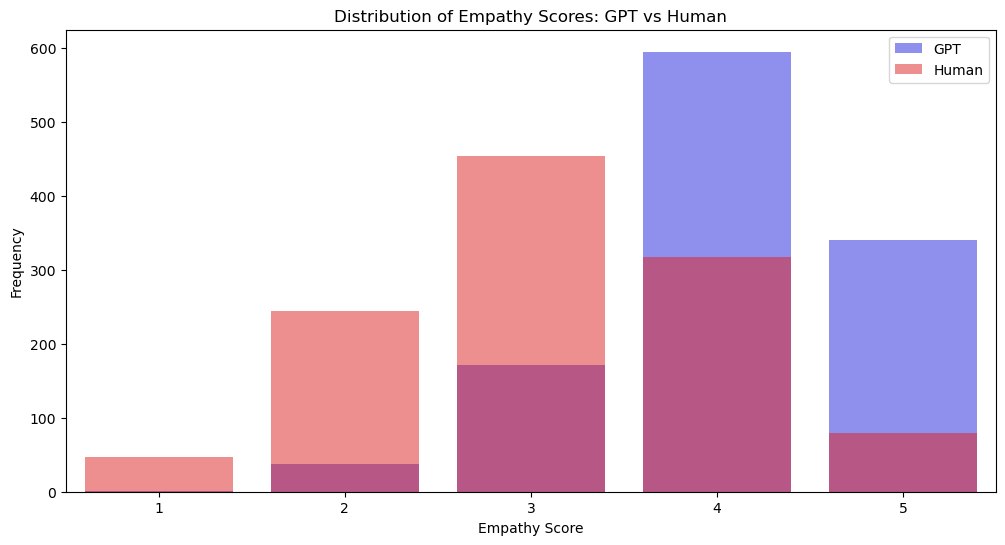

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create frequency distributions
gpt_freq = df[df['chatgpt'] == True]['empati'].value_counts().sort_index()
human_freq = df[df['chatgpt'] == False]['empati'].value_counts().sort_index()

# Plot the distributions
plt.figure(figsize=(12, 6))
sns.barplot(x=gpt_freq.index, y=gpt_freq.values, alpha=0.5, color='blue', label='GPT')
sns.barplot(x=human_freq.index, y=human_freq.values, alpha=0.5, color='red', label='Human')
plt.title('Distribution of Empathy Scores: GPT vs Human')
plt.xlabel('Empathy Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

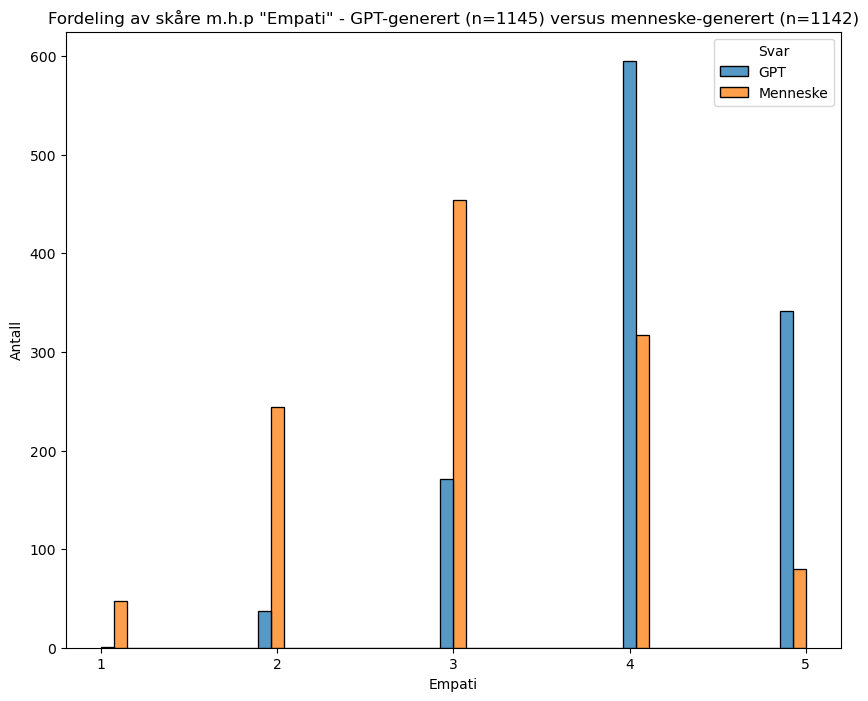

In [32]:
# Plot the distribution of the scores for "empati" -  GPT versus human

fig, ax = plt.subplots(figsize=(10, 8))

# Combine the data into a single DataFrame
df_combined = pd.concat([df_GPT[['empati']].assign(Svar='GPT'), df_human[['empati']].assign(Svar='Menneske')])

# Plot the histograms side by side
sns.histplot(data=df_combined, x='empati', hue='Svar', multiple='dodge')

# Make the x-ticks integers centerd between the two bars
plt.xticks(np.arange(1, 6, 1))

plt.xlabel('Empati')
plt.ylabel('Antall')
plt.title(f'Fordeling av skåre m.h.p "Empati" - GPT-generert (n={len(df_GPT)}) versus menneske-generert (n={len(df_human)})')


plt.show()

Investigate Which Score Categories Contribute Most to the Observed Difference:

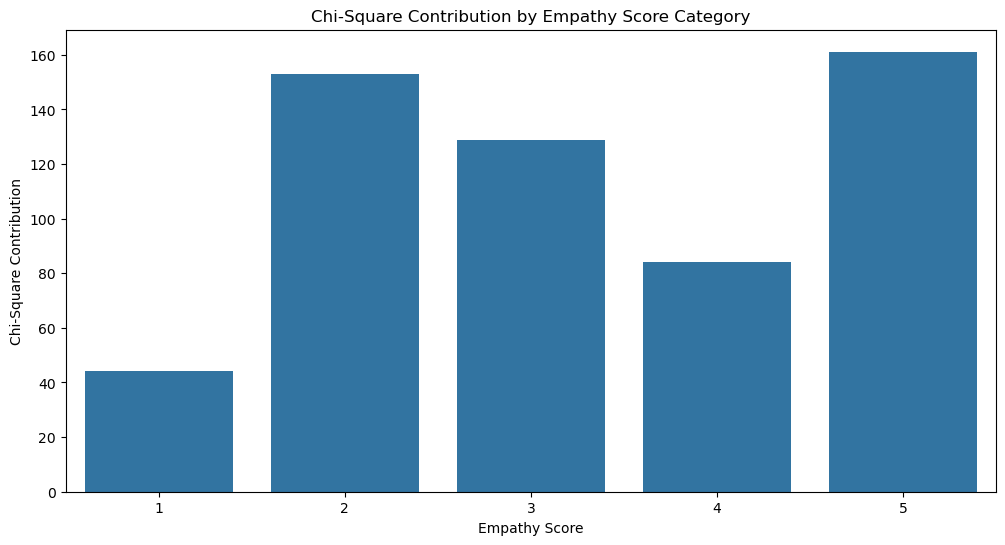

In [33]:
# Calculate the expected frequencies
total = len(df)
gpt_total = len(df[df['chatgpt'] == True])
human_total = len(df[df['chatgpt'] == False])

expected_gpt = gpt_total * (gpt_freq + human_freq) / total
expected_human = human_total * (gpt_freq + human_freq) / total

# Calculate chi-square contribution for each category
chi_square_contrib = ((gpt_freq - expected_gpt)**2 / expected_gpt + 
                      (human_freq - expected_human)**2 / expected_human)

# Plot the chi-square contributions
plt.figure(figsize=(12, 6))
sns.barplot(x=chi_square_contrib.index, y=chi_square_contrib.values)
plt.title('Chi-Square Contribution by Empathy Score Category')
plt.xlabel('Empathy Score')
plt.ylabel('Chi-Square Contribution')
plt.show()

Explore Factors Leading to Different Distributions:

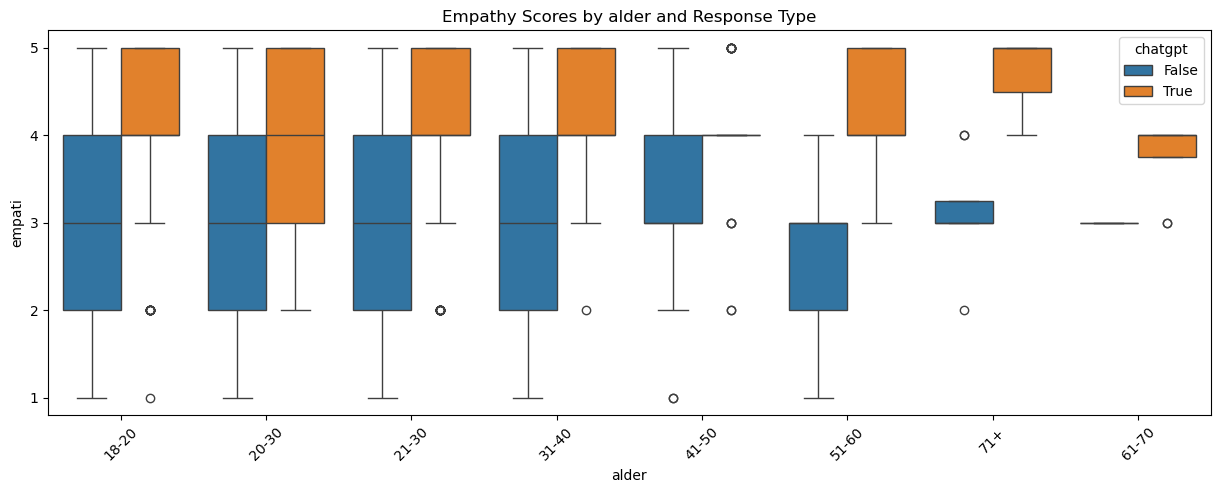

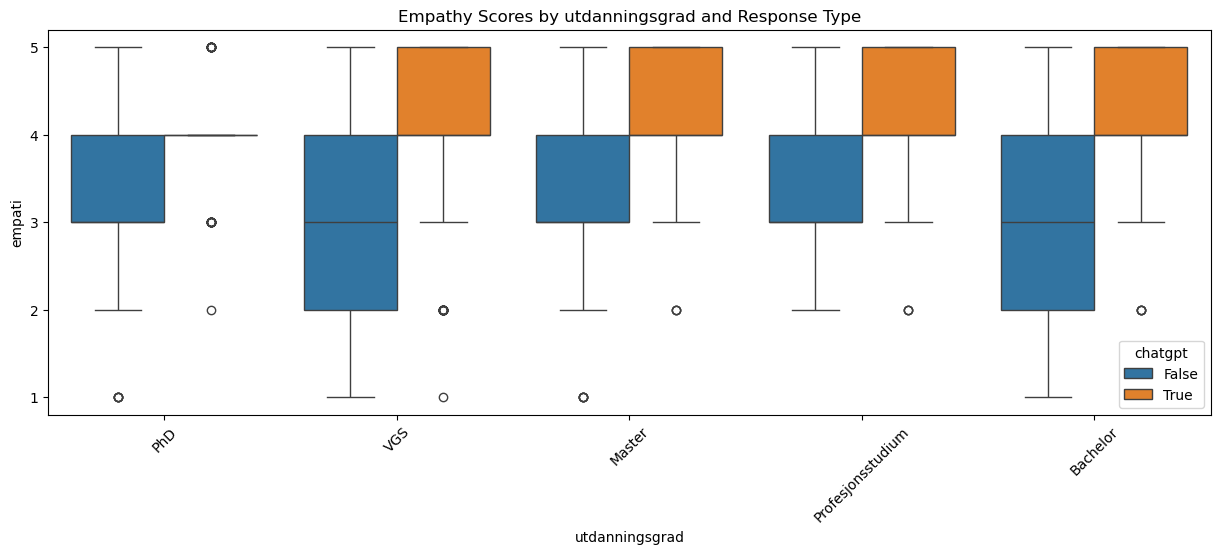

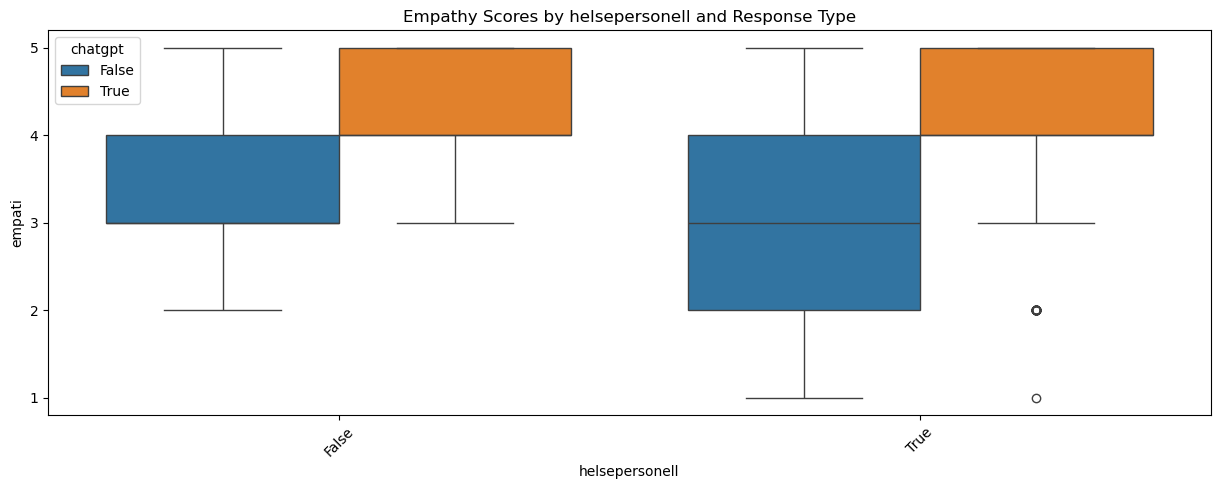

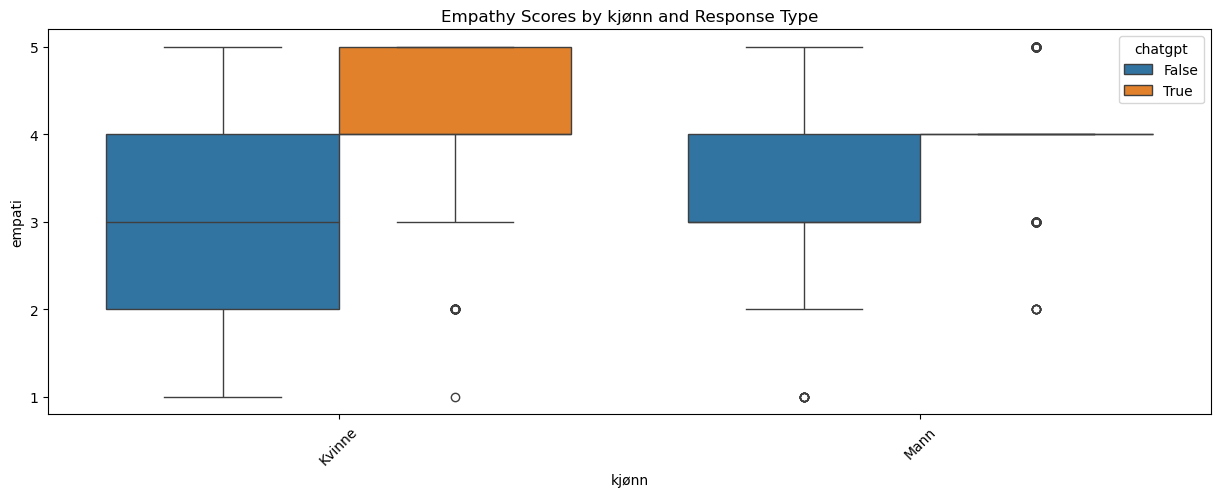

In [34]:
# Analyze by respondent characteristics
factors = ['alder', 'utdanningsgrad', 'helsepersonell', 'kjønn']

for factor in factors:
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=factor, y='empati', hue='chatgpt', data=df)
    plt.title(f'Empathy Scores by {factor} and Response Type')
     # yticks
    plt.yticks(np.arange(1, 6, 1))
    plt.xticks(rotation=45)
    plt.show()

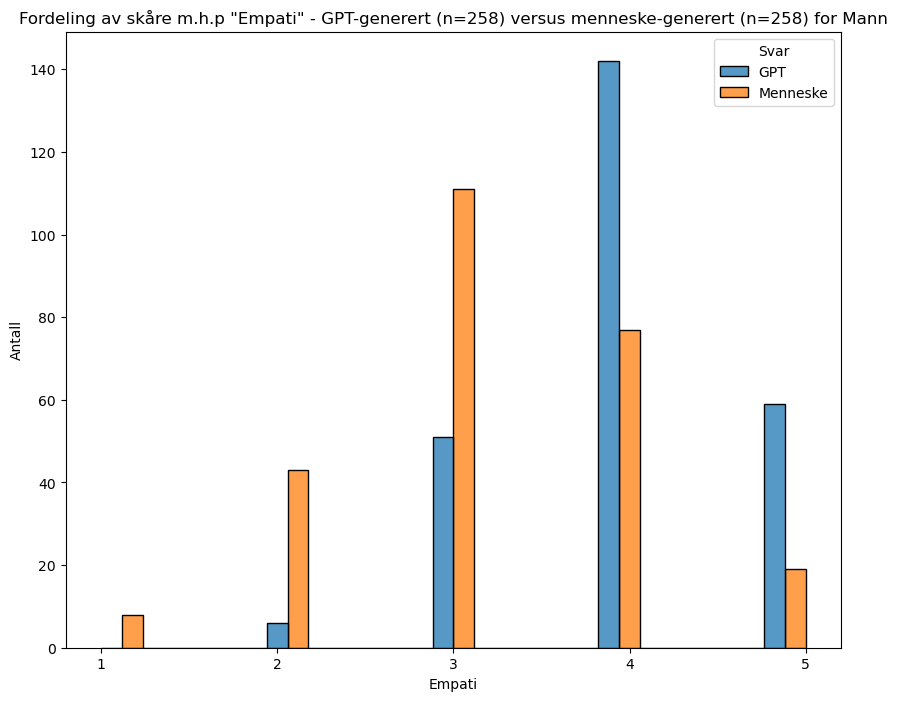

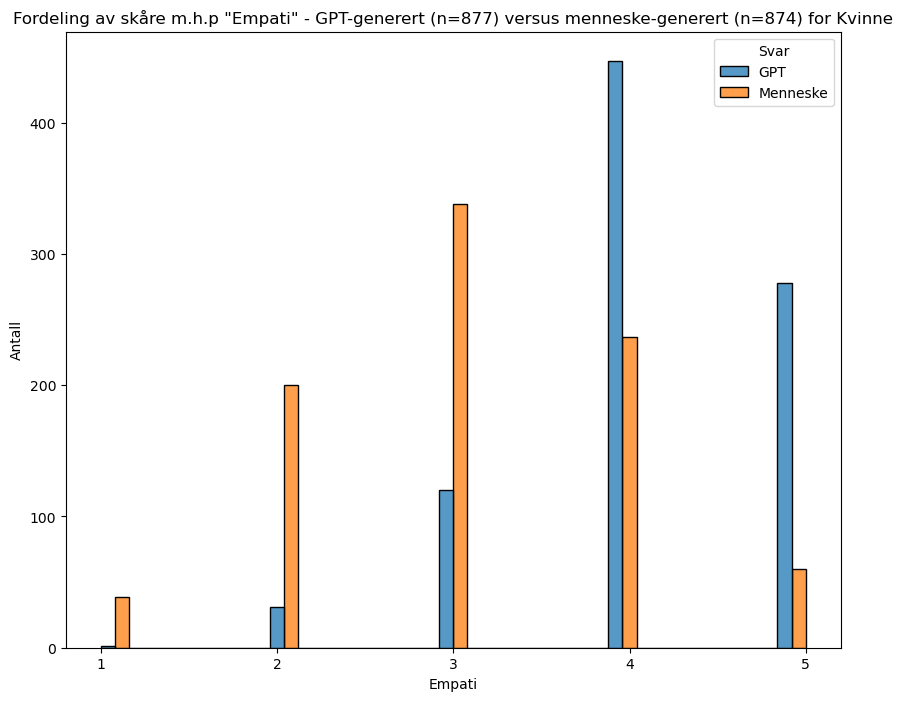

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a function to create the plot for a specific gender
def plot_empathy_distribution(df_GPT, df_human, gender):
    # Filter the dataframes for the specified gender
    df_GPT_gender = df_GPT[df_GPT['kjønn'] == gender]
    df_human_gender = df_human[df_human['kjønn'] == gender]
    
    fig, ax = plt.subplots(figsize=(10, 8))

    # Combine the data into a single DataFrame
    df_combined = pd.concat([df_GPT_gender[['empati']].assign(Svar='GPT'), 
                             df_human_gender[['empati']].assign(Svar='Menneske')])

    # Plot the histograms side by side
    sns.histplot(data=df_combined, x='empati', hue='Svar', multiple='dodge')

    # Make the x-ticks integers centered between the two bars
    plt.xticks(np.arange(1, 6, 1))

    plt.xlabel('Empati')
    plt.ylabel('Antall')
    plt.title(f'Fordeling av skåre m.h.p "Empati" - GPT-generert (n={len(df_GPT_gender)}) versus menneske-generert (n={len(df_human_gender)}) for {gender}')

    plt.show()

# Create plots for men and women
plot_empathy_distribution(df_GPT, df_human, 'Mann')
plot_empathy_distribution(df_GPT, df_human, 'Kvinne')

To explain the gender-specific differences in empathy scoring and test their significance, we'll need to perform a few steps:
First, let's summarize the empathy scores for each group (GPT and human) by gender.
Then, we'll perform statistical tests to check if these differences are significant.
Finally, we'll interpret the results.
Here's the code to do this analysis:

In [36]:
import numpy as np
from scipy import stats

# Function to calculate summary statistics
def summarize_empathy(df, group):
    return df[df['chatgpt'] == group]['empati'].agg(['mean', 'median', 'std']).to_dict()

# Summarize empathy scores
male_gpt = summarize_empathy(df[df['kjønn'] == 'Mann'], True)
male_human = summarize_empathy(df[df['kjønn'] == 'Mann'], False)
female_gpt = summarize_empathy(df[df['kjønn'] == 'Kvinne'], True)
female_human = summarize_empathy(df[df['kjønn'] == 'Kvinne'], False)

print("Male GPT:", male_gpt)
print("Male Human:", male_human)
print("Female GPT:", female_gpt)
print("Female Human:", female_human)

# Perform Mann-Whitney U tests
def mann_whitney_test(df, gender):
    gpt_scores = df[(df['kjønn'] == gender) & (df['chatgpt'] == True)]['empati']
    human_scores = df[(df['kjønn'] == gender) & (df['chatgpt'] == False)]['empati']
    return stats.mannwhitneyu(gpt_scores, human_scores, alternative='two-sided')

male_stat, male_p = mann_whitney_test(df, 'Mann')
female_stat, female_p = mann_whitney_test(df, 'Kvinne')

print("\nMann-Whitney U test results:")
print(f"Male: statistic={male_stat}, p-value={male_p}")
print(f"Female: statistic={female_stat}, p-value={female_p}")

# Test for interaction effect
def interaction_test(df):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    df['group'] = df.apply(lambda row: f"{'GPT' if row['chatgpt'] else 'Human'}_{row['kjønn']}", axis=1)
    tukey = pairwise_tukeyhsd(df['empati'], df['group'])
    return tukey

tukey_results = interaction_test(df)
print("\nTukey HSD test results:")
print(tukey_results)

Male GPT: {'mean': 3.9844961240310077, 'median': 4.0, 'std': 0.7219137571397044}
Male Human: {'mean': 3.2170542635658914, 'median': 3.0, 'std': 0.9164407577217732}
Female GPT: {'mean': 4.106043329532497, 'median': 4.0, 'std': 0.7713017300972441}
Female Human: {'mean': 3.0903890160183067, 'median': 3.0, 'std': 0.9726260597777082}

Mann-Whitney U test results:
Male: statistic=48741.0, p-value=3.4804415143806814e-22
Female: statistic=598809.0, p-value=6.573253683333461e-101

Tukey HSD test results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
  GPT_Kvinne     GPT_Mann  -0.1215 0.3514 -0.2962  0.0531  False
  GPT_Kvinne      GPT_nan    0.294 0.8937 -0.4904  1.0783  False
  GPT_Kvinne Human_Kvinne  -1.0157    0.0 -1.1335 -0.8978   True
  GPT_Kvinne   Human_Mann   -0.889    0.0 -1.0637 -0.7143   True
  GPT_Kvinne    Human_nan   -0.706 0.1058 -1

Let's interpret these results:

1. Summary Statistics:
   - Compare the mean and median empathy scores for GPT and human responses for both males and females.
   - Look at the standard deviations to understand the spread of scores in each group.

2. Mann-Whitney U Tests:
   - These tests compare GPT vs. human empathy scores separately for males and females.
   - If the p-value is less than 0.05, it indicates a significant difference between GPT and human scores for that gender.

3. Tukey HSD Test:
   - This test helps us understand if there's a significant interaction effect between gender and the source of the response (GPT vs. human).
   - Look for significant differences between groups, especially comparing:
     a) Male GPT vs. Male Human
     b) Female GPT vs. Female Human
     c) Male GPT vs. Female GPT
     d) Male Human vs. Female Human

Interpretation:

1. If both Mann-Whitney tests are significant, it suggests that both males and females perceive a difference in empathy between GPT and human responses.

2. If only one gender shows a significant difference, it might indicate that perception of empathy in AI vs. human responses varies by gender.

3. The Tukey HSD results can help us understand if:
   - The difference between GPT and human scores is consistent across genders.
   - There's a gender bias in scoring empathy, regardless of whether the response is from GPT or a human.

4. Consider the practical significance of any differences. Even if statistically significant, small differences might not be practically meaningful.

5. Think about potential reasons for any observed differences:
   - Do men and women have different expectations or criteria for empathy in medical communication?
   - Are there cultural or societal factors that might influence how different genders perceive empathy from AI vs. humans?
   - Could the phrasing or content of the responses resonate differently with men and women?

Remember, while these tests can reveal statistical patterns, interpreting the meaning and implications of these differences requires careful consideration of the study context, limitations, and potential confounding factors.

More specifically:

1. Summary Statistics:

   Male GPT:
   - Mean: 3.98
   - Median: 4.0
   - Standard Deviation: 0.72

   Male Human:
   - Mean: 3.22
   - Median: 3.0
   - Standard Deviation: 0.92

   Female GPT:
   - Mean: 4.11
   - Median: 4.0
   - Standard Deviation: 0.77

   Female Human:
   - Mean: 3.09
   - Median: 3.0
   - Standard Deviation: 0.97

Interpretation:
- Both males and females rate GPT responses higher in empathy than human responses.
- Females rate GPT responses slightly higher than males do (4.11 vs 3.98).
- Females rate human responses slightly lower than males do (3.09 vs 3.22).
- The spread of scores (standard deviation) is larger for human responses than for GPT responses, indicating more variability in perceived empathy for human responses.

2. Mann-Whitney U Test Results:

   Male: statistic=48741.0, p-value=3.48e-22
   Female: statistic=598809.0, p-value=6.57e-101

Interpretation:
- Both p-values are extremely small (< 0.05), indicating statistically significant differences between GPT and human empathy scores for both genders.
- The difference appears to be more pronounced for females (smaller p-value), suggesting that females perceive a greater disparity in empathy between GPT and human responses compared to males.

3. Tukey HSD Test Results:

Key significant differences:
- GPT_Kvinne vs Human_Kvinne: meandiff = -1.0157, p-adj = 0.0 (significant)
- GPT_Kvinne vs Human_Mann: meandiff = -0.889, p-adj = 0.0 (significant)
- GPT_Mann vs Human_Kvinne: meandiff = -0.8941, p-adj = 0.0 (significant)
- GPT_Mann vs Human_Mann: meandiff = -0.7674, p-adj = 0.0 (significant)

Interpretation:
- There are significant differences between GPT and human scores for both genders.
- The largest difference is between female GPT scores and female human scores (-1.0157).
- There's no significant difference between male and female GPT scores (GPT_Kvinne vs GPT_Mann: p-adj = 0.3514).
- There's also no significant difference between male and female human scores (Human_Kvinne vs Human_Mann: p-adj = 0.3049).

Overall Conclusions:
1. Both men and women perceive GPT responses as more empathetic than human responses.
2. The difference in perceived empathy between GPT and human responses is statistically significant for both genders.
3. Women tend to rate GPT responses slightly higher in empathy than men do, but this difference is not statistically significant.
4. Women tend to rate human responses slightly lower in empathy than men do, but again, this difference is not statistically significant.
5. The difference in perceived empathy between GPT and human responses appears to be more pronounced for women than for men.

These findings suggest that while there are clear differences in how GPT and human responses are perceived in terms of empathy, the effect of gender on these perceptions is relatively subtle. The most striking result is the consistently higher empathy ratings for GPT responses across both genders.

Statistical Tests for Factor Influence:

In [37]:
from scipy.stats import chi2_contingency

def chi_square_test(df, factor):
    contingency_table = pd.crosstab(df[factor], [df['chatgpt'], df['empati']])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {factor}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p}")
    print("---")

for factor in factors:
    chi_square_test(df, factor)

Chi-square test for alder:
Chi-square statistic: 80.08157918770245
p-value: 0.07204060802072546
---
Chi-square test for utdanningsgrad:
Chi-square statistic: 40.98146734188062
p-value: 0.2611532682828209
---
Chi-square test for helsepersonell:
Chi-square statistic: 6.655131800627516
p-value: 0.6729749432716761
---
Chi-square test for kjønn:
Chi-square statistic: 17.986240210783436
p-value: 0.035333513362240325
---


**Overall discussion:**

Let's break down the key findings and their implications:

1. Gender Differences in Empathy Perception:

   Male GPT: Mean = 3.98, Median = 4.0, SD = 0.72
   Male Human: Mean = 3.22, Median = 3.0, SD = 0.92
   Female GPT: Mean = 4.11, Median = 4.0, SD = 0.77
   Female Human: Mean = 3.09, Median = 3.0, SD = 0.97

   Key observations:
   - Both genders rate GPT responses as more empathetic than human responses.
   - Females rate GPT responses slightly higher than males do.
   - Females rate human responses slightly lower than males do.
   - The difference between GPT and human scores is larger for females.

2. Statistical Significance:

   Mann-Whitney U test results:
   Male: p-value = 3.48e-22
   Female: p-value = 6.57e-101

   These extremely low p-values indicate that the differences in empathy scores between GPT and human responses are statistically significant for both genders, with the effect being more pronounced for females.

3. Tukey HSD Test Results:

   Significant differences:
   - GPT_Kvinne vs Human_Kvinne: meandiff = -1.0157, p-adj = 0.0
   - GPT_Kvinne vs Human_Mann: meandiff = -0.889, p-adj = 0.0
   - GPT_Mann vs Human_Kvinne: meandiff = -0.8941, p-adj = 0.0
   - GPT_Mann vs Human_Mann: meandiff = -0.7674, p-adj = 0.0

   No significant differences:
   - GPT_Kvinne vs GPT_Mann: meandiff = -0.1215, p-adj = 0.3514
   - Human_Kvinne vs Human_Mann: meandiff = 0.1267, p-adj = 0.3049

4. Chi-square Tests for Factors:

   - Age: p-value = 0.07204 (not significant at α = 0.05)
   - Education level: p-value = 0.2612 (not significant)
   - Healthcare professional status: p-value = 0.6730 (not significant)
   - Gender: p-value = 0.0353 (significant at α = 0.05)

Interpretation:

1. Gender Effect: While both genders perceive GPT responses as more empathetic, this effect is slightly stronger for females. The gender of the respondent has a significant influence on empathy ratings (p = 0.0353).

2. Consistency Across Genders: Both GPT_Mann and GPT_Kvinne show significantly higher empathy scores compared to Human_Mann and Human_Kvinne. This suggests that the perception of GPT as more empathetic is consistent across genders.

3. No Significant Difference Between Genders for Same Response Type: There's no significant difference between how males and females rate GPT responses or how they rate human responses. The main difference is between GPT and human responses, not between genders.

4. Other Factors: Age, education level, and healthcare professional status do not significantly influence the empathy ratings.

Implications:

1. AI Perception: GPT is consistently perceived as more empathetic than human responses, regardless of the respondent's gender. This could have significant implications for the use of AI in healthcare communication.

2. Gender Sensitivity: The slightly stronger effect for females might suggest that women are more sensitive to or appreciative of the empathy displayed in GPT responses. This could be important for tailoring AI communication in healthcare settings.

3. Consistency of AI: The lower standard deviation in GPT scores compared to human scores suggests that GPT provides more consistently empathetic responses, while human empathy is more variable.

4. Potential Bias: It's important to consider whether this perception of higher empathy in GPT responses reflects actual higher empathy or if it's influenced by other factors (e.g., phrasing, length of responses, expectations of AI).

5. Future Research: These findings warrant further investigation into why GPT responses are perceived as more empathetic and whether this perception translates to better patient outcomes or satisfaction in real-world healthcare settings.

While GPT is consistently perceived as more empathetic than human responses across genders, the effect is slightly more pronounced for female respondents. This gender-specific difference, although small, is statistically significant and could have important implications for the development and implementation of AI in healthcare communication.

Let's discuss the factors of age (**alder**), education level (**utdanningsgrad**), and healthcare professional status (**helsepersonell**) in relation to the perception of empathy in GPT and human responses.

1. Age (Alder):
Chi-square test result: p-value = 0.07204

Interpretation:
- The p-value is slightly above the conventional significance level of 0.05, but it's close enough to warrant attention.
- This suggests that there might be a weak relationship between age and the perception of empathy in GPT vs. human responses, but it's not statistically significant at the 0.05 level.
- It could be worth exploring if there are any trends across age groups, such as younger respondents being more receptive to AI-generated empathy compared to older respondents.

Implications:
- While age doesn't significantly influence empathy ratings, the near-significant result suggests that age-related differences in perception of AI empathy might exist and could be worth investigating further with a larger sample size or more focused study.
- Healthcare providers using AI tools should be aware that different age groups might perceive AI-generated empathy slightly differently.

2. Education Level (Utdanningsgrad):
Chi-square test result: p-value = 0.2612

Interpretation:
- This p-value is well above the significance level, indicating that education level does not significantly influence the perception of empathy in GPT vs. human responses.
- The lack of significant difference suggests that people across various educational backgrounds perceive empathy in AI and human responses similarly.

Implications:
- AI-generated empathetic responses appear to be equally effective (or perceived similarly) across different education levels.
- This is a positive finding for the potential widespread use of AI in healthcare communication, as it suggests that AI-generated empathy is not biased towards or against any particular educational group.

3. Healthcare Professional Status (Helsepersonell):
Chi-square test result: p-value = 0.6730

Interpretation:
- This high p-value indicates that there is no significant difference in how healthcare professionals and non-healthcare professionals perceive empathy in GPT vs. human responses.
- Both groups seem to rate the empathy of AI and human responses similarly.

Implications:
- The fact that healthcare professionals don't rate empathy significantly differently from non-professionals is interesting. It suggests that professional training in healthcare doesn't substantially alter the perception of empathy in AI-generated responses.
- This could be seen as a positive sign for the potential integration of AI in healthcare communication, as it doesn't appear to be at odds with professional perspectives on empathy.
- However, it also raises questions about whether healthcare professionals are evaluating empathy based on different criteria than they might use in real-world patient interactions.

Overall Discussion:

1. Consistency Across Demographics: The lack of significant differences across age, education level, and professional status suggests that the perception of GPT as more empathetic than human responses is relatively consistent across these demographic factors. This consistency could be beneficial for the broad application of AI in healthcare communication.

2. Universal Appeal of AI Empathy: The results indicate that AI-generated empathetic responses have a universal appeal that transcends age, education, and professional boundaries. This could be due to the consistency and potentially more structured nature of AI responses.

3. Potential for Tailored Approaches: While the differences aren't statistically significant, the near-significant result for age suggests that there might be some value in considering age-specific approaches or further research into age-related perceptions of AI empathy.

4. Training Implications: The lack of difference between healthcare professionals and non-professionals in empathy perception raises interesting questions about empathy training in healthcare. It might be worth exploring whether AI could play a role in empathy training for healthcare professionals.

5. Further Research Needs: While these factors don't show significant differences, it would be valuable to conduct more detailed studies on each factor. For example, looking at specific age groups, particular educational backgrounds, or different types of healthcare professionals could reveal more nuanced patterns.

6. Ethical Considerations: The universal perception of AI as more empathetic across these demographics raises ethical questions about the nature of empathy and how it's perceived. Is AI truly more empathetic, or is it better at producing responses that are perceived as empathetic?

In conclusion, while gender shows a significant effect on empathy perception, age, education level, and healthcare professional status do not significantly influence how empathy is perceived in GPT vs. human responses. This suggests a broad acceptance and consistent perception of AI-generated empathy across various demographic groups, which could have important implications for the future of AI in healthcare communication.

### Hypotese 3 som undersøkes (mhp. df) er følgende:

**Hjelpsomhet** :<br>
H0: Chat-GPT 4.0 genererer _samme_ grad av hjelpsomme svar på kliniske spørsmål, sammenlignet med leger.<br>
H1: Chat-GPT 4.0 genererer _forskjellig_ grad av hjelpsomme svar på kliniske spørsmål sammenlignet med leger (trolig _mindre_ hjelpsomme).

In [38]:
from scipy.stats import mannwhitneyu

# Assuming 'df' is your dataframe and it has columns 'chatgpt' (boolean) and 'hjelpsomhet' (helpfullnes score)

# Separate the data into GPT and human responses
gpt_scores = df[df['chatgpt'] == True]['hjelpsomhet']
human_scores = df[df['chatgpt'] == False]['hjelpsomhet']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(gpt_scores, human_scores, alternative='two-sided')

# Print results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"p-value: {p_value}")

# Interpret results
alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject H0: There is a significant difference in helpfullness level between Chat-GPT 4.0 and licensed doctors.")
else:
    print("Fail to reject H0: There is no significant difference in helpfullness level between Chat-GPT 4.0 and licensed doctors.")

# Calculate and print medians for both groups
print(f"Median helpfullness score for GPT: {gpt_scores.median()}")
print(f"Median helpfullness score for humans: {human_scores.median()}")
print(f'($n_{{GPT}}$ = {len(gpt_scores)}, $n_{{human}}$ = {len(human_scores)})')

Mann-Whitney U statistic: 885049.0
p-value: 4.1654122032898306e-57
Reject H0: There is a significant difference in helpfullness level between Chat-GPT 4.0 and licensed doctors.
Median helpfullness score for GPT: 4.0
Median helpfullness score for humans: 4.0
($n_{GPT}$ = 1145, $n_{human}$ = 1142)


Let's break down this result in detail:

1. Test Used: Mann-Whitney U Test
   - This is a non-parametric test used to compare two independent groups.
   - It's appropriate when you can't assume normal distribution of the data or when dealing with ordinal data (like Likert scales).

2. Hypothesis:
   - H0 (Null Hypothesis): There is no difference in helpfulness level between Chat-GPT 4.0 and licensed doctors.
   - H1 (Alternative Hypothesis): There is a significant difference in helpfulness level between Chat-GPT 4.0 and licensed doctors.

3. Results:
   - Mann-Whitney U statistic: 885049.0
     - This is the test statistic calculated by the Mann-Whitney U test.
   - p-value: 4.1654122032898306e-57
     - This is an extremely small p-value (much smaller than the conventional significance level of 0.05).
   - Conclusion: Reject H0
     - Given the extremely small p-value, we reject the null hypothesis.

4. Interpretation:
   - There is strong statistical evidence to suggest a significant difference in helpfulness levels between Chat-GPT 4.0 and licensed doctors.
   - The difference is highly unlikely to have occurred by chance.

5. Median Scores:
   - GPT: 4.0
   - Humans: 4.0
   - Despite the significant difference found by the test, the median scores are identical. This suggests that the difference lies in the distribution of scores rather than in the central tendency.

6. Sample Sizes:
   - n_GPT = 1145
   - n_human = 1142
   - The sample sizes are nearly identical and quite large, which gives us confidence in the robustness of the results.

7. Deeper Interpretation:
   a. Distribution Differences: Given that the medians are the same but the test shows a significant difference, it's likely that the distribution of scores differs between the two groups. For example, GPT might have more scores at 4 and 5, while humans might have more spread across 3, 4, and 5.

   b. Statistical vs. Practical Significance: While the difference is statistically significant, the identical medians suggest that the practical significance might be smaller. It's important to look at the effect size or the mean difference to understand the magnitude of the difference.

   c. Sensitivity of the Test: The Mann-Whitney U test is sensitive to differences in distribution shape and spread, not just central tendency. This explains why we can have a significant result despite identical medians.

   d. Large Sample Size Effect: With large sample sizes, even small differences can become statistically significant. This doesn't always translate to practical importance.

8. Additional Considerations:
   - It would be helpful to look at the mean scores and standard deviations to get a fuller picture of the difference.
   - A visualization of the score distributions (e.g., a histogram or box plot) would provide more insight into how the scores differ between GPT and humans.
   - Consider calculating an effect size measure (like Cohen's d) to quantify the magnitude of the difference.

9. Implications:
   - While Chat-GPT 4.0 and licensed doctors have the same median helpfulness score, there's a statistically significant difference in how helpfulness is perceived overall.
   - This could mean that Chat-GPT 4.0 is perceived as helpful more consistently, or that there are subtle differences in how helpfulness manifests between AI and human responses.
   - Further investigation into the nature of these differences (e.g., qualitative analysis of responses) could provide valuable insights.

In conclusion, while the test shows a statistically significant difference in helpfulness between Chat-GPT 4.0 and licensed doctors, the identical median scores suggest that this difference may be subtle. The significance likely arises from differences in the distribution of scores rather than a stark contrast in central tendency. This result warrants further investigation to understand the practical implications of these differences in perceived helpfulness.

In [39]:
import numpy as np
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['chatgpt'], df['hjelpsomhet'])

contingency_table_margins = pd.crosstab(df['chatgpt'], df['hjelpsomhet'], margins=True)
contingency_table_margins

hjelpsomhet,1,2,3,4,5,All
chatgpt,,,,,,
False,10,121,336,540,135,1142
True,3,30,125,637,350,1145
All,13,151,461,1177,485,2287


In [40]:
# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference in the distribution of helpfullness scores between Chat-GPT 4.0 and licensed doctors.")
else:
    print("Fail to reject H0: There is no significant difference in the distribution of helpfullness scores between Chat-GPT 4.0 and licensed doctors.")

Chi-square statistic: 258.48496820271225
p-value: 9.67063513856015e-55
Reject H0: There is a significant difference in the distribution of helpfullness scores between Chat-GPT 4.0 and licensed doctors.


Let's break down these results in more detail:

1. Test Used: Chi-square test of independence
   - This test is used to determine if there is a significant relationship between two categorical variables.
   - In this case, we're testing the relationship between the source of the response (GPT vs. human) and the distribution of helpfulness scores.

2. Hypothesis:
   - H0 (Null Hypothesis): There is no significant difference in the distribution of helpfulness scores between Chat-GPT 4.0 and licensed doctors.
   - H1 (Alternative Hypothesis): There is a significant difference in the distribution of helpfulness scores between Chat-GPT 4.0 and licensed doctors.

3. Results:
   - Chi-square statistic: 258.48496820271225
     - This value quantifies how much the observed frequencies deviate from the expected frequencies.
     - A larger chi-square value suggests a greater difference between the observed and expected distributions.
   - p-value: 9.67063513856015e-55
     - This is an extremely small p-value, much smaller than any conventional significance level (e.g., 0.05 or 0.01).
   - Conclusion: Reject H0
     - Given the extremely small p-value, we reject the null hypothesis.

4. Interpretation:
   - There is very strong statistical evidence to suggest a significant difference in the distribution of helpfulness scores between Chat-GPT 4.0 and licensed doctors.
   - The difference in distributions is highly unlikely to have occurred by chance.

5. Deeper Interpretation:
   a. Distribution Differences: This test confirms that the pattern of helpfulness scores differs significantly between GPT and human responses. It doesn't just compare central tendencies but looks at the entire distribution of scores.
   
   b. Strength of Association: The large chi-square statistic suggests a strong association between the source of the response (GPT vs. human) and the helpfulness scores.
   
   c. Practical Significance: While we've established statistical significance, it's important to examine the actual distributions to understand the nature and magnitude of these differences.

6. Additional Considerations:
   a. Examine the Contingency Table: Look at the actual frequencies of scores for each group to understand where the differences lie. Are GPT scores more concentrated in higher categories? Are human scores more evenly distributed?
   
   b. Post-hoc Analysis: Consider conducting post-hoc tests to identify which specific score categories contribute most to the difference.
   
   c. Effect Size: Calculate an effect size measure (like Cramer's V) to quantify the strength of the association between the source and helpfulness scores.

7. Implications:
   - The significant difference in distributions suggests that Chat-GPT 4.0 and licensed doctors are perceived differently in terms of helpfulness.
   - This could mean that one group tends to receive more consistently high (or low) scores, while the other might have a more varied distribution.
   - It's crucial to consider what factors might be driving these differences. For example:
     * Consistency of responses
     * Depth or breadth of information provided
     * Tailoring of responses to individual queries
     * Language use or communication style

8. Limitations:
   - While the chi-square test tells us there's a significant difference, it doesn't tell us about the nature or direction of this difference.
   - It's sensitive to sample size, so with large samples, even small differences can become statistically significant.

9. Next Steps:
   - Visualize the distributions (e.g., with a grouped bar chart) to see how they differ.
   - Analyze the content of responses to understand qualitative differences that might explain the distribution differences.
   - Consider if these differences have practical implications for patient care or healthcare communication.

In conclusion, this result provides strong evidence that Chat-GPT 4.0 and licensed doctors are perceived differently in terms of helpfulness. The distribution of scores differs significantly between the two groups, suggesting fundamental differences in how their responses are perceived. This finding warrants further investigation into the specific nature of these differences and their implications for healthcare communication and potential AI integration in medical contexts.

The following analyses will help you:

1. Visualize the specific differences in score distributions between GPT and human responses.
2. Identify which score categories contribute most to the overall difference.
3. Explore how various respondent factors might influence the perception of helpfullness in GPT vs. human responses.
4. Statistically test whether these factors significantly influence the relationship between response type (GPT/human) and perceived helpfullness.

Remember to interpret these results in the context of your study and consider any limitations or potential biases in your data collection or analysis methods.

Examine Specific Frequency Distributions:

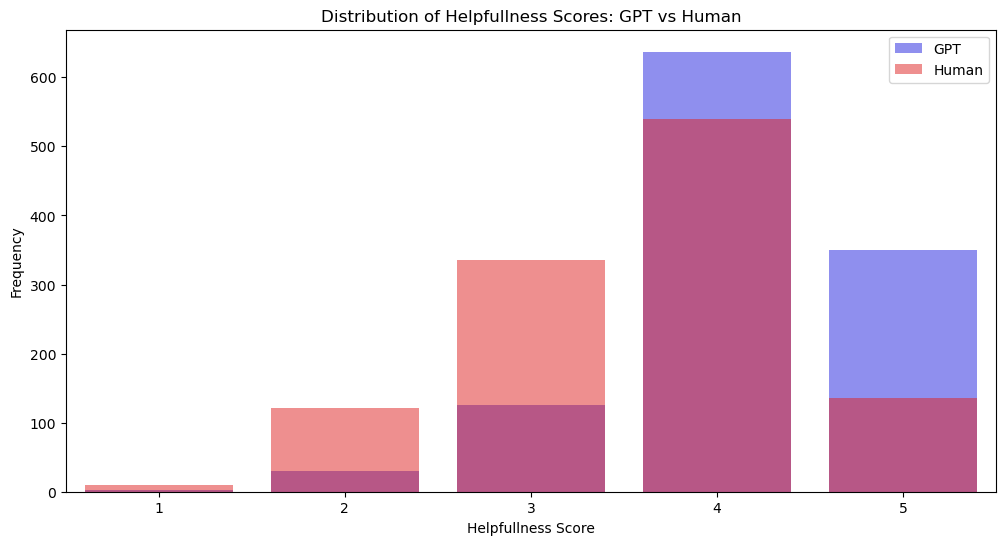

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create frequency distributions
gpt_freq = df[df['chatgpt'] == True]['hjelpsomhet'].value_counts().sort_index()
human_freq = df[df['chatgpt'] == False]['hjelpsomhet'].value_counts().sort_index()

# Plot the distributions
plt.figure(figsize=(12, 6))
sns.barplot(x=gpt_freq.index, y=gpt_freq.values, alpha=0.5, color='blue', label='GPT')
sns.barplot(x=human_freq.index, y=human_freq.values, alpha=0.5, color='red', label='Human')
plt.title('Distribution of Helpfullness Scores: GPT vs Human')
plt.xlabel('Helpfullness Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

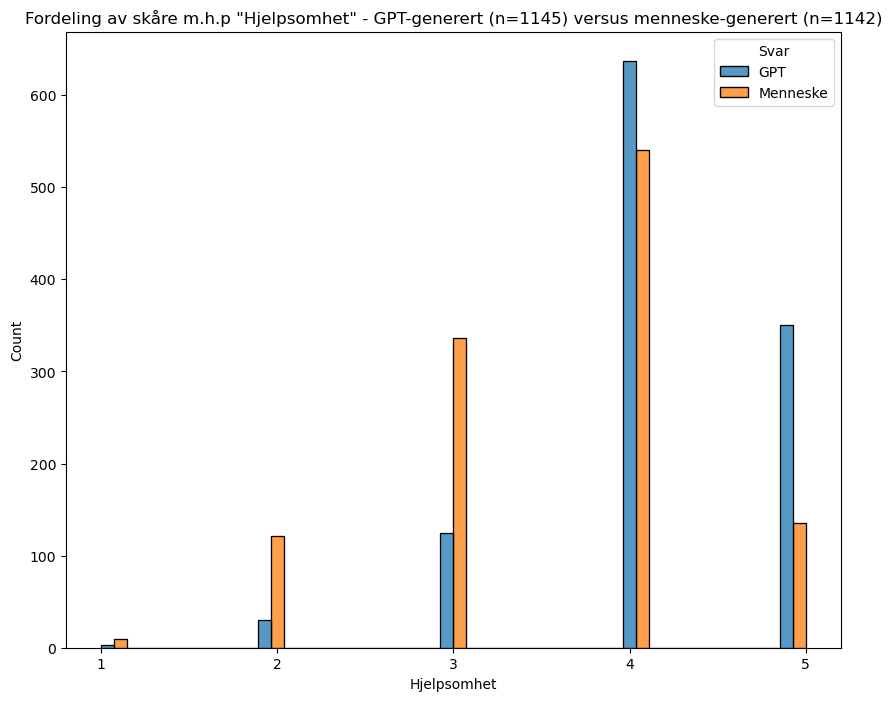

In [42]:
# Plot the distribution of the scores for "hjelpsomhet" -  GPT versus human

fig, ax = plt.subplots(figsize=(10, 8))

# Combine the data into a single DataFrame
df_combined = pd.concat([df_GPT[['hjelpsomhet']].assign(Svar='GPT'), df_human[['hjelpsomhet']].assign(Svar='Menneske')])

# Plot the histograms side by side
sns.histplot(data=df_combined, x='hjelpsomhet', hue='Svar', multiple='dodge')

# Make the x-ticks integers centerd between the two bars
plt.xticks(np.arange(1, 6, 1))

plt.xlabel('Hjelpsomhet')
plt.title(f'Fordeling av skåre m.h.p "Hjelpsomhet" - GPT-generert (n={len(df_GPT)}) versus menneske-generert (n={len(df_human)})')


plt.show()

Investigate Which Score Categories Contribute Most to the Observed Difference:

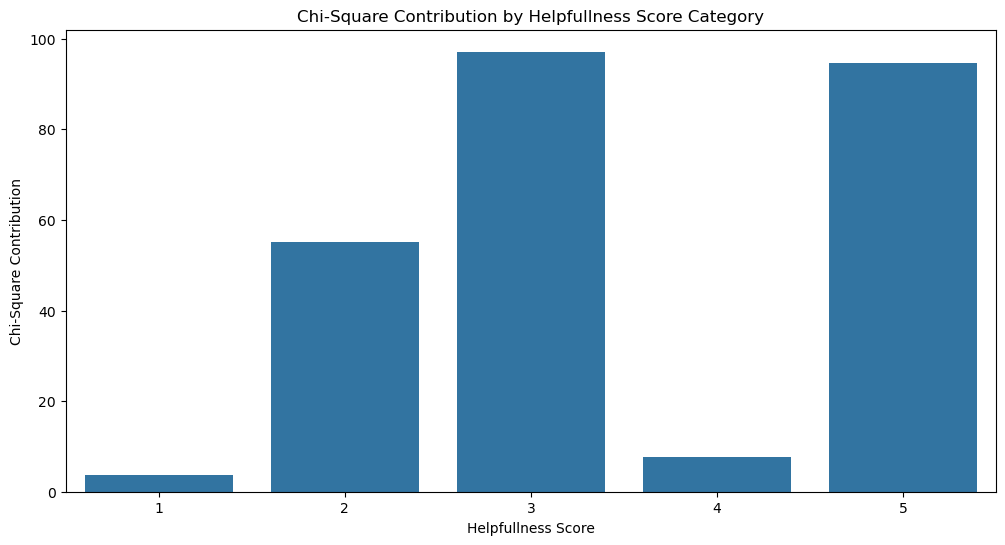

In [43]:
# Calculate the expected frequencies
total = len(df)
gpt_total = len(df[df['chatgpt'] == True])
human_total = len(df[df['chatgpt'] == False])

expected_gpt = gpt_total * (gpt_freq + human_freq) / total
expected_human = human_total * (gpt_freq + human_freq) / total

# Calculate chi-square contribution for each category
chi_square_contrib = ((gpt_freq - expected_gpt)**2 / expected_gpt + 
                      (human_freq - expected_human)**2 / expected_human)

# Plot the chi-square contributions
plt.figure(figsize=(12, 6))
sns.barplot(x=chi_square_contrib.index, y=chi_square_contrib.values)
plt.title('Chi-Square Contribution by Helpfullness Score Category')
plt.xlabel('Helpfullness Score')
plt.ylabel('Chi-Square Contribution')
plt.show()

Explore Factors Leading to Different Distributions:

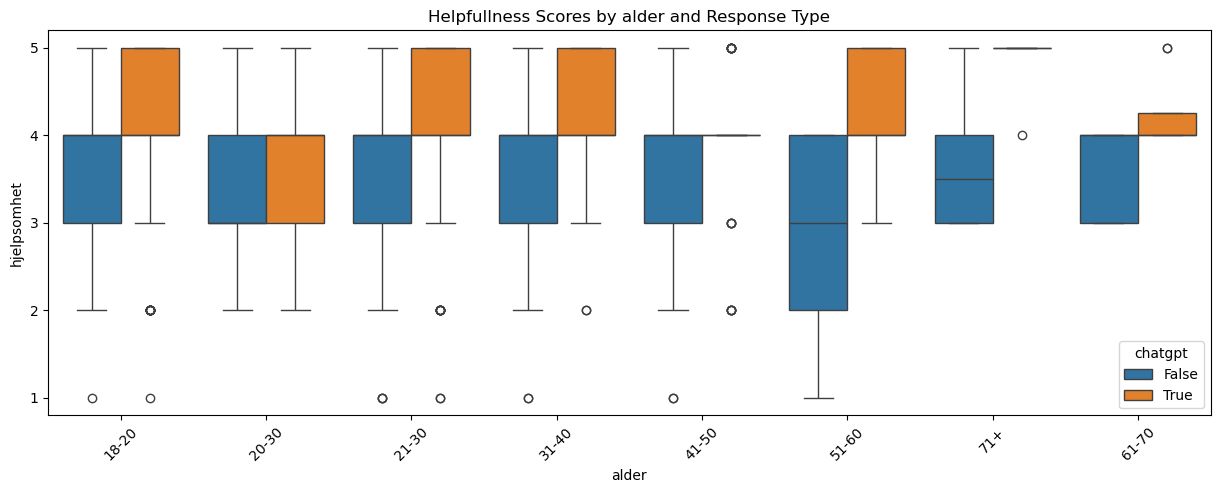

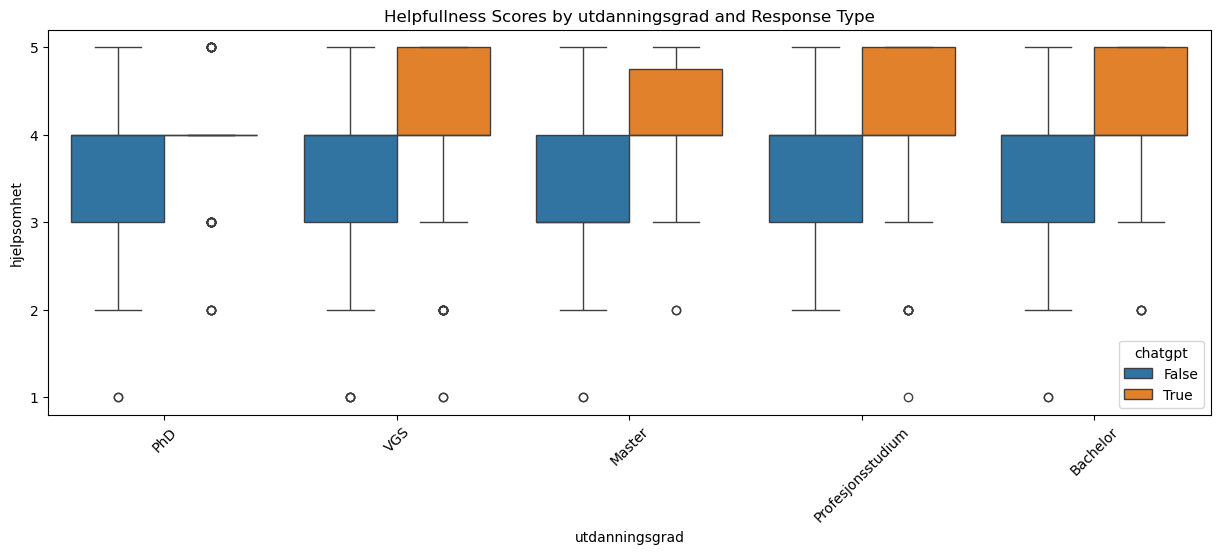

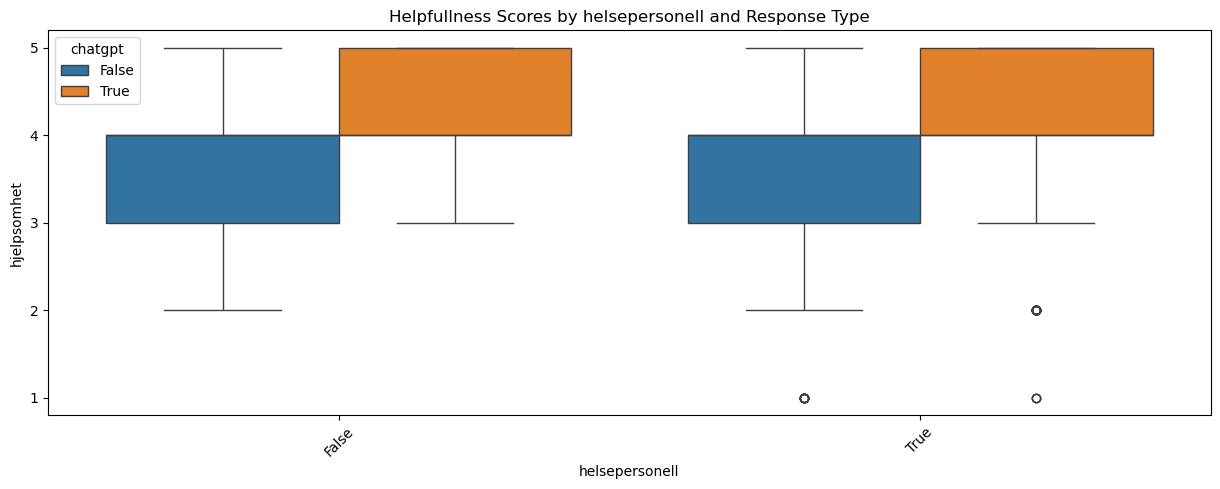

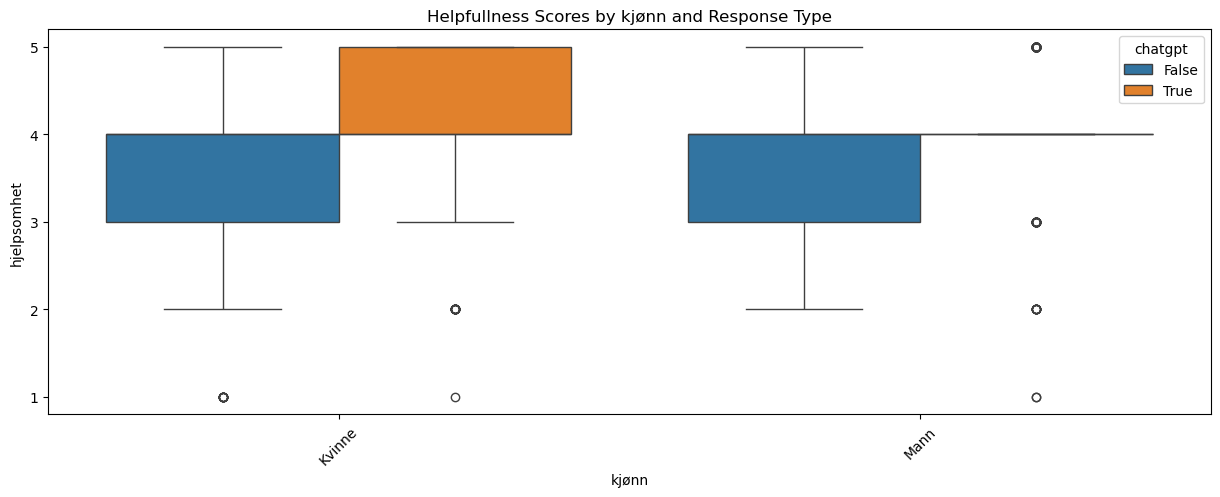

In [44]:
# Analyze by respondent characteristics
factors = ['alder', 'utdanningsgrad', 'helsepersonell', 'kjønn']

for factor in factors:
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=factor, y='hjelpsomhet', hue='chatgpt', data=df)
    plt.title(f'Helpfullness Scores by {factor} and Response Type')
     # yticks
    plt.yticks(np.arange(1, 6, 1))
    plt.xticks(rotation=45)
    plt.show()

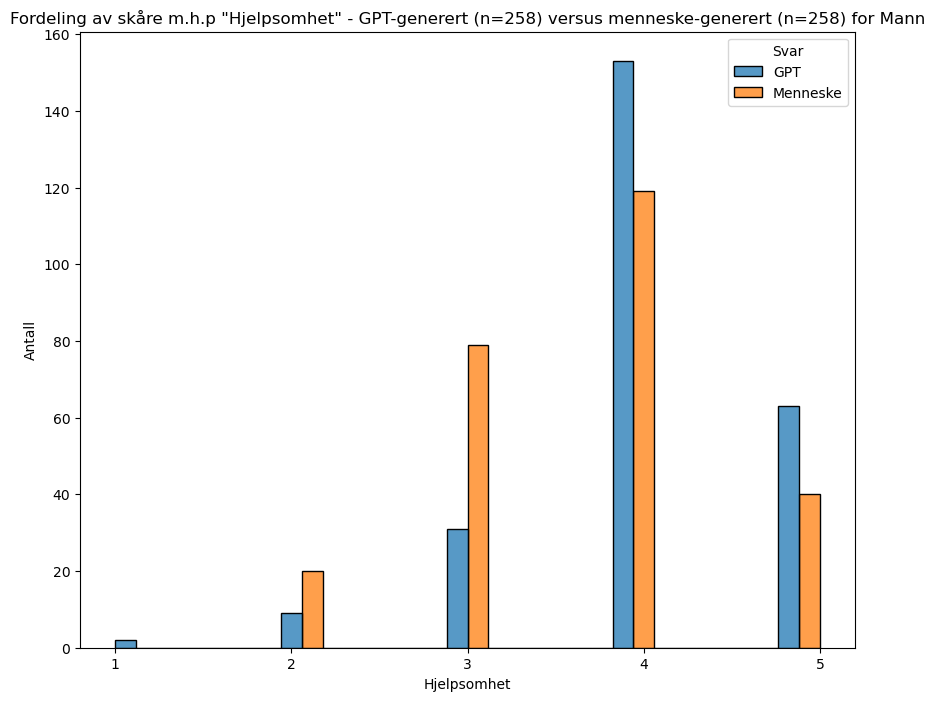

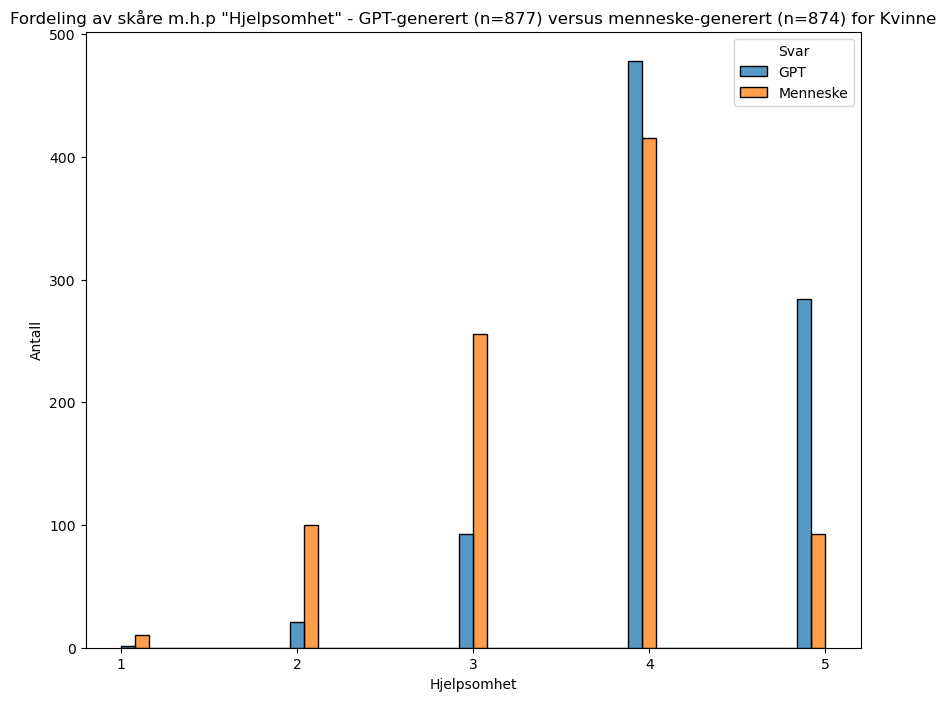

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a function to create the plot for a specific gender
def plot_helpfullness_distribution(df_GPT, df_human, gender):
    # Filter the dataframes for the specified gender
    df_GPT_gender = df_GPT[df_GPT['kjønn'] == gender]
    df_human_gender = df_human[df_human['kjønn'] == gender]
    
    fig, ax = plt.subplots(figsize=(10, 8))

    # Combine the data into a single DataFrame
    df_combined = pd.concat([df_GPT_gender[['hjelpsomhet']].assign(Svar='GPT'), 
                             df_human_gender[['hjelpsomhet']].assign(Svar='Menneske')])

    # Plot the histograms side by side
    sns.histplot(data=df_combined, x='hjelpsomhet', hue='Svar', multiple='dodge')

    # Make the x-ticks integers centered between the two bars
    plt.xticks(np.arange(1, 6, 1))

    plt.xlabel('Hjelpsomhet')
    plt.ylabel('Antall')
    plt.title(f'Fordeling av skåre m.h.p "Hjelpsomhet" - GPT-generert (n={len(df_GPT_gender)}) versus menneske-generert (n={len(df_human_gender)}) for {gender}')

    plt.show()

# Create plots for men and women
plot_helpfullness_distribution(df_GPT, df_human, 'Mann')
plot_helpfullness_distribution(df_GPT, df_human, 'Kvinne')

In [46]:
import numpy as np
from scipy import stats

# Function to calculate summary statistics
def summarize_helpfullness(df, group):
    return df[df['chatgpt'] == group]['hjelpsomhet'].agg(['mean', 'median', 'std']).to_dict()

# Summarize empathy scores
male_gpt = summarize_helpfullness(df[df['kjønn'] == 'Mann'], True)
male_human = summarize_helpfullness(df[df['kjønn'] == 'Mann'], False)
female_gpt = summarize_helpfullness(df[df['kjønn'] == 'Kvinne'], True)
female_human = summarize_helpfullness(df[df['kjønn'] == 'Kvinne'], False)

print("Male GPT:", male_gpt)
print("Male Human:", male_human)
print("Female GPT:", female_gpt)
print("Female Human:", female_human)

# Perform Mann-Whitney U tests
def mann_whitney_test(df, gender):
    gpt_scores = df[(df['kjønn'] == gender) & (df['chatgpt'] == True)]['hjelpsomhet']
    human_scores = df[(df['kjønn'] == gender) & (df['chatgpt'] == False)]['hjelpsomhet']
    return stats.mannwhitneyu(gpt_scores, human_scores, alternative='two-sided')

male_stat, male_p = mann_whitney_test(df, 'Mann')
female_stat, female_p = mann_whitney_test(df, 'Kvinne')

print("\nMann-Whitney U test results:")
print(f"Male: statistic={male_stat}, p-value={male_p}")
print(f"Female: statistic={female_stat}, p-value={female_p}")

# Test for interaction effect
def interaction_test(df):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    df['group'] = df.apply(lambda row: f"{'GPT' if row['chatgpt'] else 'Human'}_{row['kjønn']}", axis=1)
    tukey = pairwise_tukeyhsd(df['hjelpsomhet'], df['group'])
    return tukey

tukey_results = interaction_test(df)
print("\nTukey HSD test results:")
print(tukey_results)

Male GPT: {'mean': 4.0310077519379846, 'median': 4.0, 'std': 0.7582283722804847}
Male Human: {'mean': 3.693798449612403, 'median': 4.0, 'std': 0.8247392643502618}
Female GPT: {'mean': 4.166476624857468, 'median': 4.0, 'std': 0.7132906674157354}
Female Human: {'mean': 3.5503432494279177, 'median': 4.0, 'std': 0.8709942818268075}

Mann-Whitney U test results:
Male: statistic=41179.0, p-value=3.3834872121105195e-07
Female: statistic=532542.0, p-value=6.060251134719616e-53

Tukey HSD test results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
  GPT_Kvinne     GPT_Mann  -0.1355 0.1543  -0.296  0.0251  False
  GPT_Kvinne      GPT_nan   0.0335    1.0 -0.6874  0.7545  False
  GPT_Kvinne Human_Kvinne  -0.6161    0.0 -0.7245 -0.5078   True
  GPT_Kvinne   Human_Mann  -0.4727    0.0 -0.6332 -0.3121   True
  GPT_Kvinne    Human_nan  -0.2665 0.8993 -0.9

La oss oppsummere og forklare de viktigste funnene:

1. Generell oversikt:
   - Totalt antall vurderinger: 2287
   - GPT-genererte svar: 1145
   - Menneskegenererte svar: 1142

2. Kunnskap:
   - Median score for GPT: 5.0
   - Median score for mennesker: 4.0
   - Chi-square test: p-verdi = 3.24e-42 (statistisk signifikant forskjell)
   - Mann-Whitney U-test: p-verdi = 2.40e-45 (statistisk signifikant forskjell)
   - Gjennomsnittlig score (ekskludert "Vet ikke"):
     GPT: 4.37 ± 0.79
     Mennesker: 3.86 ± 0.99

   Tolkning: GPT-genererte svar ble vurdert som signifikant mer kunnskapsrike enn menneskegenererte svar.

3. Empati:
   - Median score for GPT: 4.0
   - Median score for mennesker: 3.0
   - Chi-square test: p-verdi = 2.57e-122 (statistisk signifikant forskjell)
   - Mann-Whitney U-test: p-verdi = 1.11e-122 (statistisk signifikant forskjell)

   Tolkning: GPT-genererte svar ble vurdert som signifikant mer empatiske enn menneskegenererte svar.

4. Hjelpsomhet:
   - Median score for både GPT og mennesker: 4.0
   - Chi-square test: p-verdi = 9.67e-55 (statistisk signifikant forskjell)
   - Mann-Whitney U-test: p-verdi = 4.17e-57 (statistisk signifikant forskjell)
   - Gjennomsnittlig score:
     GPT: 4.14 ± 0.72
     Mennesker: 3.59 ± 0.86

   Tolkning: Selv om medianscoren er lik, viser testene en signifikant forskjell i fordelingen av scores. GPT-genererte svar ble generelt vurdert som mer hjelpsomme.

5. Kjønnsforskjeller:
   - Både menn og kvinner vurderte GPT-svar høyere på empati og hjelpsomhet.
   - Forskjellen mellom GPT og menneskelige svar var større for kvinner enn for menn.

6. Helsepersonell vs. ikke-helsepersonell:
   - Ingen signifikant forskjell i hvordan helsepersonell og ikke-helsepersonell vurderte kunnskapen i GPT-svar (p = 0.16).

7. Andre demografiske faktorer:
   - Alder, utdanningsnivå og kjønn viste noen signifikante forskjeller i vurderingene, men effekten var mindre uttalt enn forskjellen mellom GPT og menneskelige svar.

Hovedkonklusjoner:
1. GPT-genererte svar ble konsekvent vurdert som mer kunnskapsrike, empatiske og hjelpsomme enn menneskegenererte svar.
2. Forskjellen i vurderinger mellom GPT og menneskelige svar var mer uttalt for kvinnelige respondenter.
3. Helsepersonell og ikke-helsepersonell hadde lignende vurderinger av GPT-svarenes kunnskap.
4. Demografiske faktorer som alder og utdanningsnivå hadde noen effekter på vurderingene, men disse var mindre betydningsfulle enn forskjellen mellom GPT og menneskelige svar.

Disse funnene reiser interessante spørsmål om hvordan AI-genererte svar oppfattes i helsekontekster, og kan ha implikasjoner for fremtidig bruk av AI i helsekommunikasjon og pasientrådgivning.

Statistical Tests for Factor Influence:

In [47]:
from scipy.stats import chi2_contingency

def chi_square_test(df, factor):
    contingency_table = pd.crosstab(df[factor], [df['chatgpt'], df['hjelpsomhet']])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {factor}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p}")
    print("---")

for factor in factors:
    chi_square_test(df, factor)

Chi-square test for alder:
Chi-square statistic: 119.72670283340085
p-value: 2.154778866451646e-05
---
Chi-square test for utdanningsgrad:
Chi-square statistic: 62.937928347030635
p-value: 0.0035988953830751445
---
Chi-square test for helsepersonell:
Chi-square statistic: 2.3318518131830346
p-value: 0.9850689939297292
---
Chi-square test for kjønn:
Chi-square statistic: 19.242873804451925
p-value: 0.02320518508117492
---


La oss analysere hver faktor og dens betydning for vurderingen av hjelpsomhet i svarene:

1. Alder:
   Chi-square statistic: 119.72670283340085
   p-value: 2.154778866451646e-05

   Tolkning:
   - P-verdien er svært lav (p < 0.05), noe som indikerer en statistisk signifikant sammenheng mellom alder og vurdering av hjelpsomhet.
   - Dette betyr at ulike aldersgrupper har en tendens til å vurdere hjelpsomheten i svarene forskjellig.

   Implikasjoner:
   - Alder spiller en viktig rolle i hvordan personer oppfatter og vurderer hjelpsomheten i svar, enten de er generert av GPT eller mennesker.
   - Det kan være nødvendig å tilpasse kommunikasjonsstrategier for ulike aldersgrupper i helsevesenet.
   - Videre forskning bør undersøke hvordan og hvorfor ulike aldersgrupper vurderer hjelpsomhet forskjellig.

2. Utdanningsgrad:
   Chi-square statistic: 62.937928347030635
   p-value: 0.0035988953830751445

   Tolkning:
   - P-verdien er under 0.05, noe som indikerer en statistisk signifikant sammenheng mellom utdanningsnivå og vurdering av hjelpsomhet.
   - Dette antyder at personer med ulik utdanningsbakgrunn har en tendens til å vurdere hjelpsomheten i svarene forskjellig.

   Implikasjoner:
   - Utdanningsnivå påvirker hvordan personer oppfatter og vurderer hjelpsomheten i helserelaterte svar.
   - Dette kan ha betydning for hvordan helseinformasjon bør kommuniseres til ulike grupper i samfunnet.
   - Det kan være behov for å tilpasse kommunikasjonsstrategier basert på målgruppens utdanningsnivå.

3. Helsepersonell:
   Chi-square statistic: 2.3318518131830346
   p-value: 0.9850689939297292

   Tolkning:
   - P-verdien er svært høy (p > 0.05), noe som indikerer at det ikke er en statistisk signifikant sammenheng mellom helsepersonellstatus og vurdering av hjelpsomhet.
   - Dette betyr at helsepersonell og ikke-helsepersonell generelt vurderer hjelpsomheten i svarene på lignende måter.

   Implikasjoner:
   - Helsepersonellstatus ser ikke ut til å påvirke vurderingen av hjelpsomhet i betydelig grad.
   - Dette kan tyde på at GPT-genererte svar og menneskelige svar oppfattes som like hjelpsomme (eller uhjelpsomme) av både helsepersonell og ikke-helsepersonell.
   - Det kan indikere at AI-genererte svar potensielt kan være nyttige for både fagfolk og pasienter.

4. Kjønn:
   Chi-square statistic: 19.242873804451925
   p-value: 0.02320518508117492

   Tolkning:
   - P-verdien er under 0.05, noe som indikerer en statistisk signifikant sammenheng mellom kjønn og vurdering av hjelpsomhet.
   - Dette betyr at menn og kvinner har en tendens til å vurdere hjelpsomheten i svarene noe forskjellig.

   Implikasjoner:
   - Kjønnsforskjeller spiller en rolle i hvordan hjelpsomhet oppfattes i helserelaterte svar.
   - Dette kan ha betydning for hvordan helseinformasjon bør kommuniseres til ulike kjønn.
   - Videre forskning bør undersøke årsakene til disse kjønnsforskjellene og hvordan de kan adresseres i helsekommunikasjon.

Samlet diskusjon:

Disse resultatene viser at demografiske faktorer som alder, utdanningsnivå og kjønn har en signifikant innvirkning på hvordan personer vurderer hjelpsomheten i helserelaterte svar, enten de er generert av AI eller mennesker. Dette har flere viktige implikasjoner:

1. Persontilpasnng av helsekommunikasjon: Det kan være nødvendig å tilpasse kommunikasjonsstrategier basert på målgruppens alder, utdanningsnivå og kjønn for å maksimere oppfattelsen av hjelpsomhet.

2. AI-utvikling: Ved utvikling av AI-systemer for helsekommunikasjon bør man ta hensyn til disse demografiske faktorene for å sikre at svarene oppfattes som hjelpsomme av ulike grupper.

3. Opplæring av helsepersonell: Helsepersonell bør være oppmerksomme på hvordan ulike demografiske grupper kan oppfatte hjelpsomhet forskjellig, og tilpasse sin kommunikasjon deretter.

4. Likhet i helsevesenet: Forskjellene i oppfattet hjelpsomhet basert på demografiske faktorer kan potensielt føre til ulikheter i helseutfall. Dette bør adresseres for å sikre likeverdig tilgang til nyttig helseinformasjon.

5. Videre forskning: Det er behov for mer detaljerte studier for å forstå de underliggende årsakene til disse forskjellene og hvordan de best kan adresseres i helsekommunikasjon.

6. Universell design: Til tross for forskjellene, bør målet være å utvikle kommunikasjonsstrategier og AI-systemer som er universelt hjelpsomme, uavhengig av demografiske faktorer.

Avslutningsvis er det verdt å merke seg at selv om disse demografiske faktorene er signifikante, ser helsepersonellstatus ut til å ha minimal innvirkning på vurderingen av hjelpsomhet. Dette kan tyde på at AI-genererte svar har potensial til å være nyttige på tvers av ulike nivåer av helsekompetanse.

### Hypotese 4 som undersøkes (mhp. df1) er følgende:

**Respondent kategori** :<br>
H0: leger og medisinstudenter med lisens vurderer Chat-GPT 4.0 sine svar på kliniske spørsmål som _like_ kunnskapsrike som hva andre som jobber/ studerer eller har bakgrunn i helsevesenet gjør i vurderingen av Chat-GPT 4.0 sine svar mhp. kunnskap.<br>
H1: leger og medisinstudenter med lisens vurderer Chat-GPT 4.0 sine svar på kliniske spørsmå til å ha _ulik_ grad av kunnskap sammenliknet med hva andre som jobber/ studerer eller har bakgrunn i helsevesenet gjør.

In [48]:
# df_GPT_MD = df_GPT[df_GPT['helsepersonell'] == True]
# df_GPT_nonMD = df_GPT[df_GPT['helsepersonell'] == False]

df_GPT_MD = df_GPT[df_GPT['harlisens'] == True]
df_GPT_nonMD = df_GPT[df_GPT['harlisens'] == False]

print(f'len(df_GPT_MD)={len(df_GPT_MD)}, len(df_GPT_nonMD)={len(df_GPT_nonMD)}')

len(df_GPT_MD)=170, len(df_GPT_nonMD)=975


In [49]:
# Make new dataframes df_GPT_MD_kunnskap_excl6 and df_GPT_nonMD_kunnskap_excl6 where kunnskap is not 6

df_GPT_MD_kunnskap_excl6 = df_GPT_MD[df_GPT_MD['kunnskap'] != 6]
df_GPT_nonMD_kunnskap_excl6 = df_GPT_nonMD[df_GPT_nonMD['kunnskap'] != 6]

print(f'len(df_GPT_MD_kunnskap_excl6)={len(df_GPT_MD_kunnskap_excl6)}, len(df_GPT_nonMD_kunnskap_excl6)={len(df_GPT_nonMD_kunnskap_excl6)}')    


len(df_GPT_MD_kunnskap_excl6)=169, len(df_GPT_nonMD_kunnskap_excl6)=925


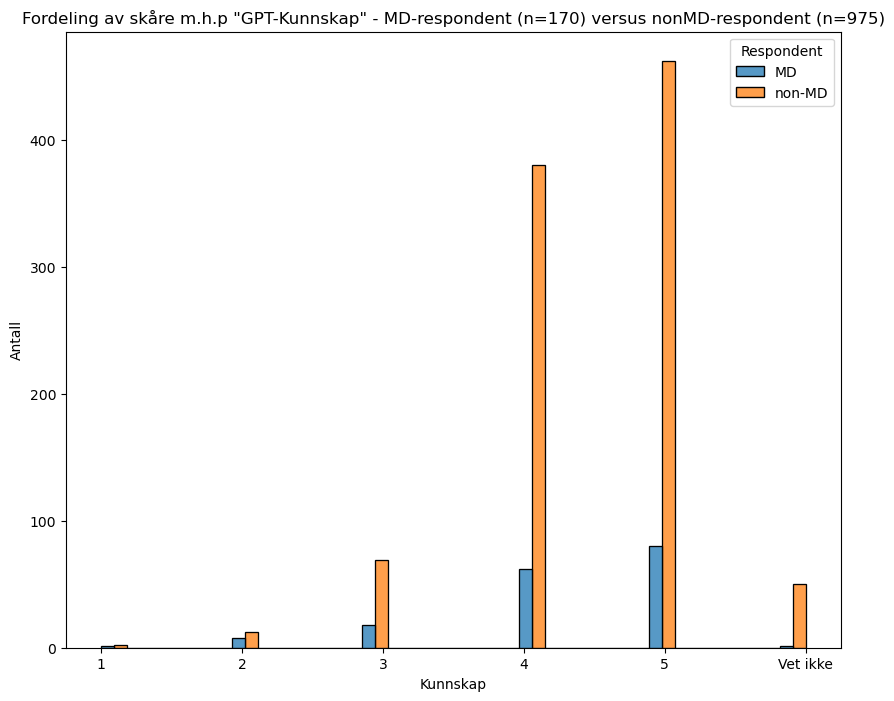

In [50]:
# Plot the distribution of the scores for GPT "kunnskap" -  MD versus nonMD

fig, ax = plt.subplots(figsize=(10, 8))

# Combine the data into a single DataFrame
df_combined = pd.concat([df_GPT_MD[['kunnskap']].assign(Respondent='MD'), df_GPT_nonMD[['kunnskap']].assign(Respondent='non-MD')])

# Plot the histograms side by side
sns.histplot(data=df_combined, x='kunnskap', hue='Respondent', multiple='dodge')

# Make the x-ticks integers centerd between the two bars
plt.xticks(np.arange(1, 7, 1))

plt.xlabel('Kunnskap')
plt.ylabel('Antall')
plt.title(f'Fordeling av skåre m.h.p "GPT-Kunnskap" - MD-respondent (n={len(df_GPT_MD)}) versus nonMD-respondent (n={len(df_GPT_nonMD)})')

# Make the x-ticks integers centerd between the two bars
plt.xticks(np.arange(1, 7, 1))

# Assuming 'plt' is the current plot
ticks, labels = plt.xticks()  # Get current x-axis tick labels

# Find the index of the tick mark 6
index = list(ticks).index(6)

# Replace the label at the index with 'Vet ikke'
labels[index] = 'Vet ikke'

plt.xticks(ticks, labels)  # Set new x-axis tick labels


plt.show()

In [51]:
# Test the following hypothesis: H0: The distribution of the scores regarding GPT's kunnskap: MD vs. non-MD and are the same 
# vs. H1: The distribution of the scores regarding GPT's kunnskap: MD vs. non-MD and are different (MD's scores are likely lower)

# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(df_GPT_MD_kunnskap_excl6['kunnskap'], df_GPT_nonMD_kunnskap_excl6['kunnskap'])
print(f'stat={stat}, p={p}')

# Interpret the p-value
alpha = 0.05

if p > alpha:
    print('Samme fordeling (kan ikke forkaste H0)')
else:
    print('Forskjellig fordeling (forkast H0)')

print(f'($n_{{GPT_MD}}$ = {len(df_GPT_MD_kunnskap_excl6)}, $n_{{GPT_nonMD}}$ = {len(df_GPT_nonMD_kunnskap_excl6)})')

stat=73384.0, p=0.16033145626526613
Samme fordeling (kan ikke forkaste H0)
($n_{GPT_MD}$ = 169, $n_{GPT_nonMD}$ = 925)


In [52]:
# How large is the difference in the mean scores of GPT-kunnskap for MDs vs. non-MDs?

mean_MD = df_GPT_MD_kunnskap_excl6['kunnskap'].mean()
mean_nonMD = df_GPT_nonMD_kunnskap_excl6['kunnskap'].mean()

std_MD = df_GPT_MD_kunnskap_excl6['kunnskap'].std()
std_nonMD = df_GPT_nonMD_kunnskap_excl6['kunnskap'].std()

diff = mean_MD - mean_nonMD
print(f'Mean score for GPT-kunnskap for MDs: {mean_MD:.2f} std={std_MD:.2f} (n={len(df_GPT_MD)})')
print(f'Mean score for GPT-kunnskap for non-MDs: {mean_nonMD:.2f} std={std_nonMD:.2f} (n={len(df_GPT_nonMD)})')
print(f'Difference in mean scores: {diff:.2f}')

Mean score for GPT-kunnskap for MDs: 4.25 std=0.87 (n=170)
Mean score for GPT-kunnskap for non-MDs: 4.39 std=0.70 (n=975)
Difference in mean scores: -0.14


### Back to original data frame

In [53]:
df[:2].T

,0,1
vurderingid,1,4
respondentid,6,7
svarid,1,1
kunnskap,3,2
empati,4,4
hjelpsomhet,4,3
alder,18-20,18-20
utdanningsgrad,PhD,PhD
helsepersonell,True,True
harlisens,False,False


In [54]:
# Write df[:2].T as LateX table


print(df[:2].T.to_latex(index=True, formatters={"name": str.upper}, bold_rows=True, float_format="{:.1f}".format)) # , file=open('table.tex', 'w'))

\begin{tabular}{lll}
\toprule
 & 0 & 1 \\
\midrule
\textbf{vurderingid} & 1 & 4 \\
\textbf{respondentid} & 6 & 7 \\
\textbf{svarid} & 1 & 1 \\
\textbf{kunnskap} & 3 & 2 \\
\textbf{empati} & 4 & 4 \\
\textbf{hjelpsomhet} & 4 & 3 \\
\textbf{alder} & 18-20 & 18-20 \\
\textbf{utdanningsgrad} & PhD & PhD \\
\textbf{helsepersonell} & True & True \\
\textbf{harlisens} & False & False \\
\textbf{kjønn} & Kvinne & Kvinne \\
\textbf{svartfør} & False & False \\
\textbf{fylke} & Vestland & Vestland \\
\textbf{dato} & 2024-01-15T10:39:13.805Z & 2024-01-15T10:39:27.752Z \\
\textbf{spørsmålid} & 1 & 1 \\
\textbf{chatgpt} & False & False \\
\textbf{svartekst} & Takk for spørsmålet ditt! Jeg skal være ærlig på at dette er ikke mitt ekspertområdet og måtte gjøre et lite artikkelsøk før jeg kunne svare deg. Det jeg kunne lese fra en studie utført av FHI (folkehelseinstituttet) er at de mener at inntak av små flak av teflon belegg regnes ikke å ha noe signifikant helsefare. Det jeg også kunne lese er at 

In [55]:
df[-2:].T

,2285,2286
vurderingid,2265,2266
respondentid,635,635
svarid,393,392
kunnskap,4,4
empati,4,4
hjelpsomhet,4,4
alder,21-30,21-30
utdanningsgrad,Bachelor,Bachelor
helsepersonell,True,True
harlisens,False,False


# Compare human versus GPT

**Ideas for questions to ask:**

1. Comparison of Performance: How do the evaluation scores differ between humans and GPT in terms of knowledge, empathy, and helpfulness? This question aims to identify specific areas where one might outperform the other.

2. Score Correlation Analysis: Is there a correlation between the scores assigned to human responses and those assigned to GPT responses across the same questions? Understanding this could reveal if perceptions towards humans and GPT are consistent across respondents.

3. Impact of Healthcare Profession: How does being a healthcare professional influence the evaluation of human versus GPT responses? This could help identify if professional experience affects the perception of accuracy or empathy in responses.

4. Influence of Gender: Does the respondent's gender have an impact on the scoring of human and GPT responses? This question seeks to uncover if there are gender-based biases in evaluating responses.

5. Age-Related Differences: How does the age of respondents affect their evaluation of human versus GPT responses? Age could influence familiarity with technology or expectations of empathy, thus affecting scores.

6. Educational Level's Effect: What role does the educational background play in scoring human and GPT responses? This could highlight if higher education correlates with a critical evaluation of responses.

7. Inter-Criteria Correlation: Is there a significant correlation between the scores on the criteria of knowledge, helpfulness, and empathy? This question aims to understand if high scores in one area tend to coincide with high scores in others, indicating a general positive or negative bias.

8. Textual Analysis for Themes and Sentiments: What common themes, words, or phrases emerge from the response texts, and how do sentiments differ between GPT and human responses? This analysis could reveal underlying patterns in what is valued in responses or how certain topics are approached differently by humans and GPT.

In [56]:
len(df)

2287

In [57]:
# Get value.count sorted on 'kunnskap', 'empati', 'hjelepsomhet' for which chatgpt is True
subset_df = df[df['chatgpt'] == True]
items = ['kunnskap', 'empati', 'hjelpsomhet']
for item in items: 
    value_counts = subset_df[item].value_counts().sort_values(ascending=False)
    print(f'chatgp ({item}): \n{value_counts}')


chatgp (kunnskap): 
kunnskap
5    542
4    442
3     87
6     51
2     20
1      3
Name: count, dtype: int64
chatgp (empati): 
empati
4    595
5    341
3    171
2     37
1      1
Name: count, dtype: int64
chatgp (hjelpsomhet): 
hjelpsomhet
4    637
5    350
3    125
2     30
1      3
Name: count, dtype: int64


In [58]:
items = ['kunnskap', 'empati', 'hjelpsomhet']
nested_table = df.groupby(['chatgpt'] + items).size().reset_index(name='counts')

# To sort the table
nested_table = nested_table.sort_values(by='counts', ascending=False)

print(nested_table)


     chatgpt  kunnskap  empati  hjelpsomhet  counts
108     True         4       4            4     227
126     True         5       5            5     195
122     True         5       4            4     170
41     False         4       3            4     152
44     False         4       4            4     103
..       ...       ...     ...          ...     ...
105     True         4       3            5       1
120     True         5       4            2       1
127     True         6       2            4       1
128     True         6       3            1       1
134     True         6       5            3       1

[137 rows x 5 columns]


In [59]:
items = ['kunnskap', 'empati', 'hjelpsomhet']
nested_table = df.groupby(['chatgpt'] + items).size().reset_index(name='counts')

# To sort the table
nested_table = nested_table.sort_values(by='counts', ascending=False)
sorted_table = nested_table.sort_values(by=['chatgpt']+items)

sorted_table

,chatgpt,kunnskap,empati,hjelpsomhet,counts
0,False,1,1,1,5
1,False,1,3,2,1
2,False,2,1,2,10
3,False,2,1,3,1
4,False,2,2,2,26
...,...,...,...,...,...
132,True,6,4,4,21
133,True,6,4,5,3
134,True,6,5,3,1
135,True,6,5,4,4


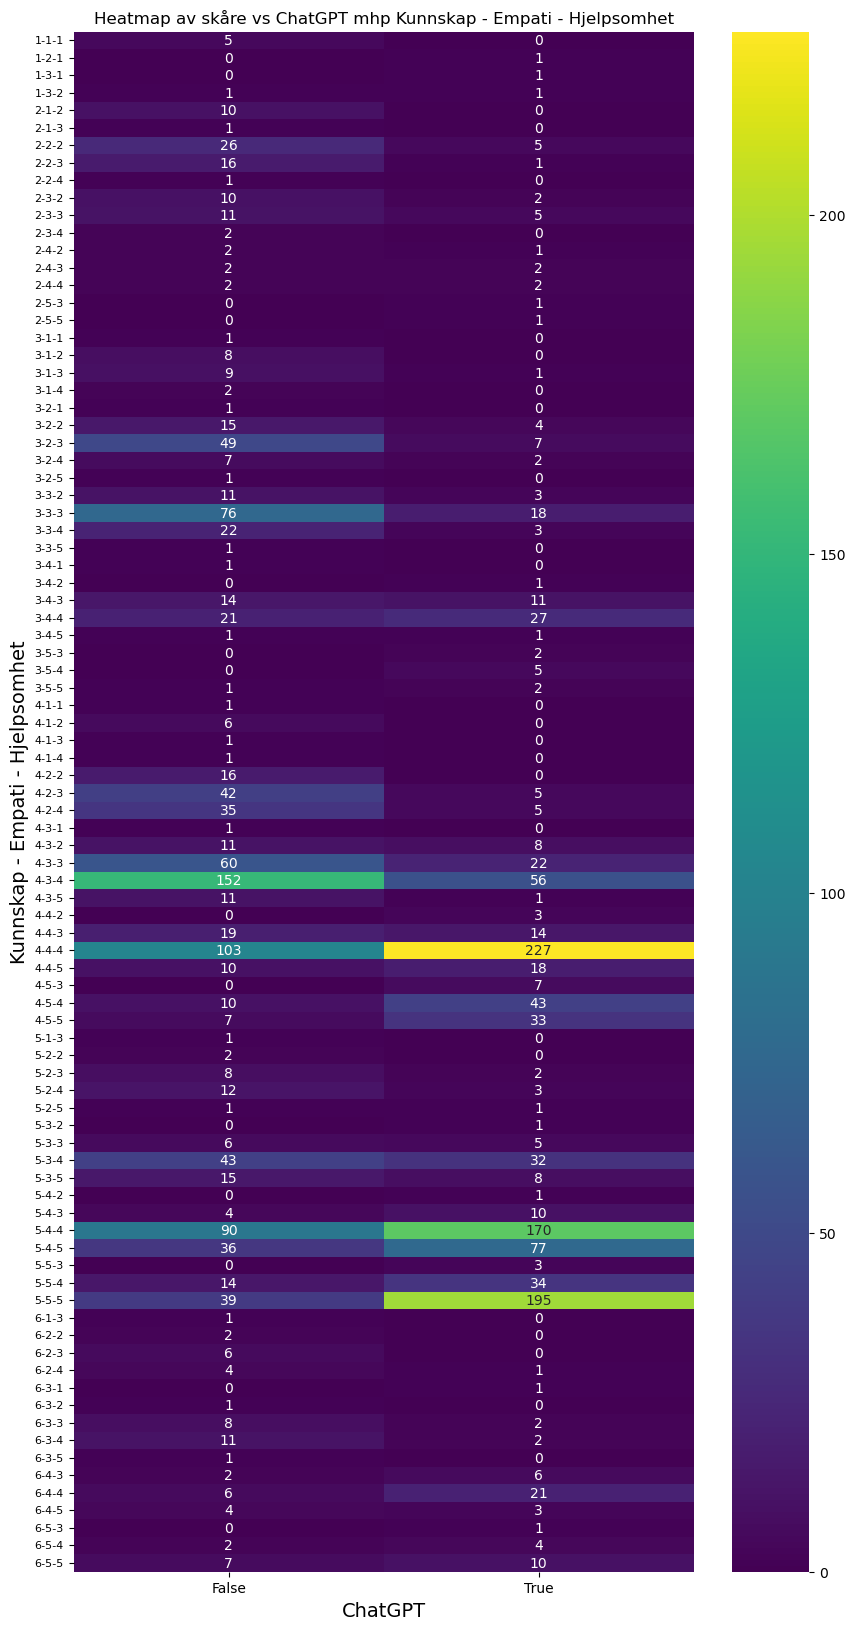

In [60]:
# A heatmap to illustrate the effect of chatgpt True or False on the structure of the sorted_table across items

import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the table
pivot_table = sorted_table.pivot_table(values='counts', index=items, columns='chatgpt', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 20))  # Increase figure size
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='viridis', yticklabels=True)

figtitle = f'Heatmap av skåre vs ChatGPT mhp {items[0].capitalize()} - {items[1].capitalize()} - {items[2].capitalize()}'
plt.title(figtitle)
plt.yticks(fontsize=8)  # Decrease y-tick label font size
plt.ylabel(f'{items[0].capitalize()} - {items[1].capitalize()} - {items[2].capitalize()}', fontsize=14)
plt.xlabel(f'ChatGPT', fontsize=14)

plt.show()

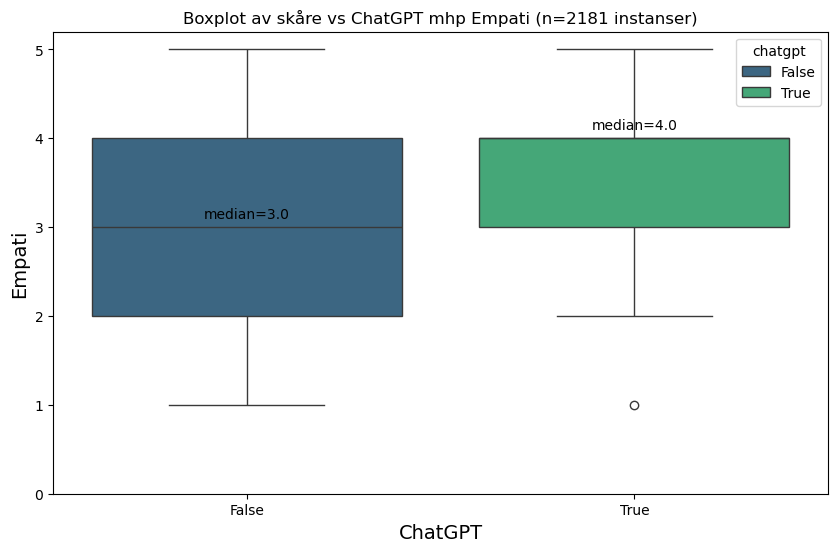

In [61]:
# Plot score distribution on 'empati' grouped by 'chatgpt'

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create the boxplot
plt.figure(figsize=(10, 6))  # Increase figure size
sns.boxplot(data=sorted_table, x='chatgpt', y='empati', hue='chatgpt', palette='viridis')

# Integer ticks on y-axis
plt.yticks(np.arange(0, 6, 1))

figtitle = f'Boxplot av skåre vs ChatGPT mhp Empati (n={len(df1)} instanser)'
plt.title(figtitle)
plt.ylabel('Empati', fontsize=14)
plt.xlabel('ChatGPT', fontsize=14)

# Add median values across all instances for each chatgpt group in the legend text
medians = sorted_table.groupby(['chatgpt'])['empati'].median()
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick, label in zip(pos, plt.gca().get_xticklabels()):
    plt.text(pos[tick], medians.iloc[tick] + 0.1, f'median={median_labels[tick]}', 
             horizontalalignment='center', size=10, color='black', weight='normal')

plt.show()

In [62]:
df['empati'].value_counts()

empati
4    912
3    625
5    421
2    281
1     48
Name: count, dtype: int64

In [63]:
df['hjelpsomhet'].value_counts()

hjelpsomhet
4    1177
5     485
3     461
2     151
1      13
Name: count, dtype: int64

In [64]:
df.groupby('chatgpt')['kunnskap'].mean()

chatgpt
False    3.961471
True     4.443668
Name: kunnskap, dtype: float64

In [65]:
df.groupby('chatgpt')['kunnskap'].std()

chatgpt
False    0.989119
True     0.790357
Name: kunnskap, dtype: float64

In [66]:
# Function to generate a correlation heatmap
def correlation_heatmap(df, savefig=False):
    corr = df[['kunnskap', 'empati', 'hjelpsomhet']].corr()
    plt.figure(figsize=(15, 5))  
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.show()

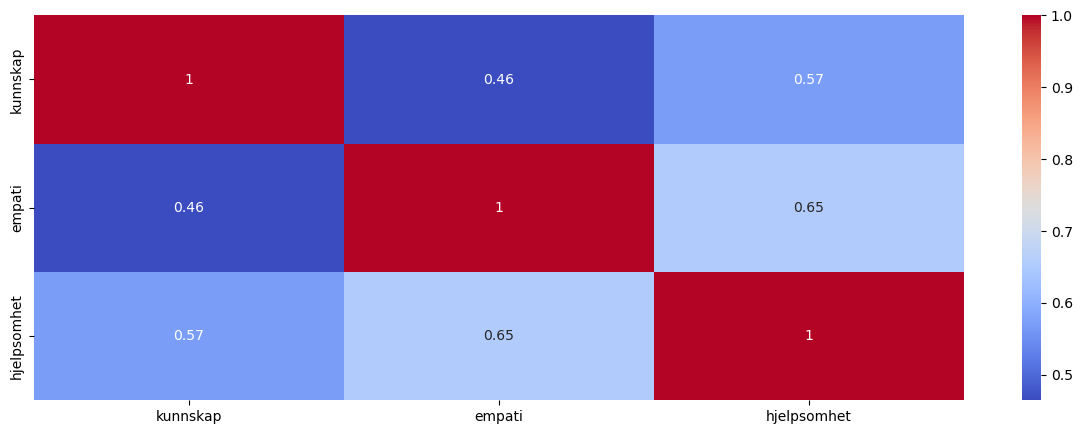

In [67]:
correlation_heatmap(df, savefig=False)

In [68]:
from wordcloud import WordCloud

# Function to generate a wordcloud
def generate_wordcloud(df, high=True):
    if high:
        text = ' '.join(df[df['kunnskap'] > 3]['svartekst'])
    else:
        text = ' '.join(df[df['kunnskap'] <= 3]['svartekst'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(15, 5))  
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

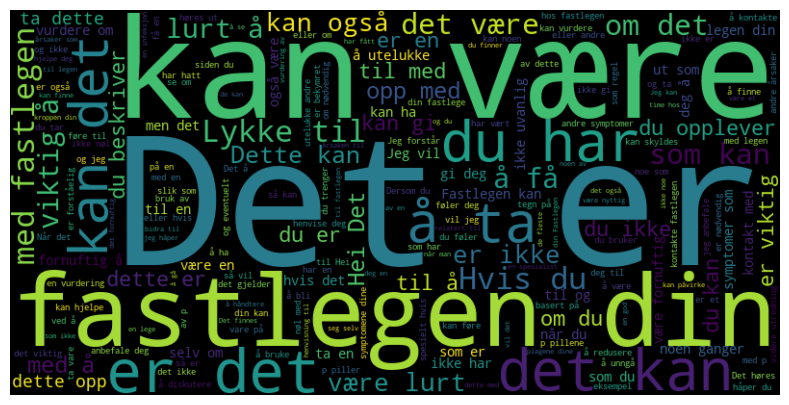

In [69]:
generate_wordcloud(df, high=True)